**Author :** Rutendo F. Sigauke

**Input  :** 
1. Significantly correlated DBNascent pairs across tissues
2. Gene and bidirectional overlap file
3. Summary of transcription levels across samples
4. Metadata
5. ChIA-PET supported DBNascent Pairs
6. GTEx eQTLs supported DBNascent Pairs

**Output :**

Figures and summaries

# Load libraries

In [114]:
library(data.table)
library(ggplot2)
library(cowplot)

# Import data

## Significant pairs

In [2]:
sig_pairs_path <- "/scratch/Shares/dowell/dbnascent/out/meta_analysis/gene_bidir_significant_pairs"

##get paths for the tables
corr_sig_files <- list.files(path=sig_pairs_path,
                         pattern="tsv.gz",
                         full.names=TRUE)

##load all correlation files 
corr_sig_DT_list <- lapply(corr_sig_files,
                       data.table::fread,
                       nThread = 10) 

In [3]:
#get list of files
sig_pairs_filenames <- list.files(path=sig_pairs_path,
                         pattern="tsv.gz",
                         full.names=FALSE)

#extract the tissue ids from file name
tissue_ids <- as.character(lapply(strsplit(sig_pairs_filenames, '_'),
                                                    `[`, 2)) 

#replace the dash with spaces
tissue_ids_space <- gsub("-", " ", tissue_ids)
tissue_ids_space

[1] "blood"          "breast"         "embryo"         "heart"         
 [5] "intestine"      "kidney"         "lung"           "prostate"      
 [9] "skin"           "umbilical cord" "uterus"

In [4]:
# add a column with tissue names
corr_sig_DT_list <- mapply(`[<-`, corr_sig_DT_list, 'tissue', value = tissue_ids_space, SIMPLIFY = FALSE)

# merge all the pair table
corr_sig_strict_DT <- do.call(rbind, corr_sig_DT_list)

# add gene id column
corr_sig_strict_DT$gene_id <- as.character(lapply(strsplit(corr_sig_strict_DT$transcript_1, ':'),
                                                    `[`, 1))

# add a pair id column
corr_sig_strict_DT$pair_id <- paste0(corr_sig_strict_DT$transcript_1,
                                "~",
                              corr_sig_strict_DT$transcript_2)


nrow(corr_sig_strict_DT)
head(corr_sig_strict_DT)

[1] 8315182

transcript1_chrom,transcript1_start,transcript1_stop,transcript_1,transcript1_score,transcript1_strand,transcript2_chrom,transcript2_start,transcript2_stop,transcript_2,⋯,nObs,t,distance_tss,distance_tes,position,percent_transcribed_both,bidirectional_location,tissue,gene_id,pair_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr10,46887,48546,TUBB8:NM_177987.3,.,-,chr10,749695,750013,chr10:749695-750013,⋯,4,188.756638,-701308,-702967,upstream,1.801802,intergenic,blood,TUBB8,TUBB8:NM_177987.3~chr10:749695-750013
chr10,46887,48546,TUBB8:NM_177987.3,.,-,chr10,986401,986877,chr10:986401-986877,⋯,48,4.750869,-938093,-939752,upstream,21.621622,intergenic,blood,TUBB8,TUBB8:NM_177987.3~chr10:986401-986877
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,124900,125180,chr10:124900-125180,⋯,130,4.684712,-55703,-124750,upstream,58.558559,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:124900-125180
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,125590,125860,chr10:125590-125860,⋯,153,6.711378,-55018,-124065,upstream,68.918919,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:125590-125860
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,126570,127168,chr10:126570-127168,⋯,190,5.516402,-53874,-122921,upstream,85.585586,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:126570-127168
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,704805,705165,chr10:704805-705165,⋯,43,5.119993,524242,455195,downstream,19.369369,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:704805-705165


In [5]:
length(unique(corr_sig_strict_DT$pair_id))

[1] 4853276

## Transcript summary

In [6]:
gene_bidir_tpm_summary_allBidirs_filteredSamples <- data.table::fread('/Users/rusi2317/projects/meta_analysis_qc_reviews/processed_data/normalized_counts/summary_gene_bidir_tpm_filtered.tsv.gz')
dim(gene_bidir_tpm_summary_allBidirs_filteredSamples)
head(gene_bidir_tpm_summary_allBidirs_filteredSamples, 3)

[1] 876410     19

chrom,start,stop,gene_transcript,score,strand,length,stdev,variance,sum,mean,median,coefvar,max,min,num_transcribed,percent_transcribed,transcript_type,bidirectional_type
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
chr1,12623,14409,DDX11L1:NR_046018.2,.,+,1787,0.07496376,0.005619565,7.345779,0.00978133,0.0000000,7.6639642,1.256177,0,29,3.861518,genes,genes
chr1,14361,28620,WASH7P:NR_024540.1,.,-,14260,0.20321583,0.041296674,186.403807,0.24820747,0.1942185,0.8187338,1.417130,0,749,99.733688,genes,genes
chr1,17368,17436,MIR6859-1:NR_106918.1,.,-,69,0.00000000,0.000000000,0.000000,0.00000000,0.0000000,NA,0.000000,0,0,0.000000,genes,genes


In [7]:
gene_bidir_tpm_summary_allBidirs_filtered_txpd <- subset(gene_bidir_tpm_summary_allBidirs_filteredSamples,
                                                        num_transcribed > 2)
dim(gene_bidir_tpm_summary_allBidirs_filtered_txpd)

[1] 866772     19

In [8]:
transcripts_total <- as.data.frame(table(gene_bidir_tpm_summary_allBidirs_filteredSamples$transcript_type))
transcripts_total

Var1,Freq
<fct>,<int>
bidirectional,847521
genes,28889


In [9]:
transcripts_with_counts <- as.data.frame(table(gene_bidir_tpm_summary_allBidirs_filtered_txpd$transcript_type))
transcripts_with_counts$percent_transcrpts <- 100*(transcripts_with_counts$Freq/transcripts_total$Freq)
transcripts_with_counts

Var1,Freq,percent_transcrpts
<fct>,<int>,<dbl>
bidirectional,838337,98.91637
genes,28435,98.42847


## Bidirectional and gene distances

In [10]:
bidir_gene_dist <- data.table::fread("/Users/rusi2317/projects/meta_analysis_qc_reviews/annotations/hg38_tfit_dreg_bidirectionals_genesTSS_distances.bed") 
colnames(bidir_gene_dist) <- c('bidir_chrom','bidir_start','bidir_end','bidirs',
                             'bidir_score','bidir_strand', 'gene_chrom',
                             'gene_start','gene_end','gene_id',
                             'gene_score','gene_strand','bidir_gene_dist')

bidir_gene_dist$bidir_id <- paste0(bidir_gene_dist$bidir_chrom,':',
                              bidir_gene_dist$bidir_start,'-',
                              bidir_gene_dist$bidir_end)

bidir_gene_dist$pair_id <- paste0(bidir_gene_dist$gene_id,
                                "~",
                                bidir_gene_dist$bidir_id)

head(bidir_gene_dist)

bidir_chrom,bidir_start,bidir_end,bidirs,bidir_score,bidir_strand,gene_chrom,gene_start,gene_end,gene_id,gene_score,gene_strand,bidir_gene_dist,bidir_id,pair_id
<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
chr1,3917,4919,dreg,14,.,chr1,11873,11874,DDX11L1:NR_046018.2,.,+,6955,chr1:3917-4919,DDX11L1:NR_046018.2~chr1:3917-4919
chr1,5632,6042,dreg,14,.,chr1,11873,11874,DDX11L1:NR_046018.2,.,+,5832,chr1:5632-6042,DDX11L1:NR_046018.2~chr1:5632-6042
chr1,6132,6486,dreg,7,.,chr1,11873,11874,DDX11L1:NR_046018.2,.,+,5388,chr1:6132-6486,DDX11L1:NR_046018.2~chr1:6132-6486
chr1,7207,7841,dreg,7,.,chr1,11873,11874,DDX11L1:NR_046018.2,.,+,4033,chr1:7207-7841,DDX11L1:NR_046018.2~chr1:7207-7841
chr1,10945,11371,"tfit,dreg",1,.,chr1,11873,11874,DDX11L1:NR_046018.2,.,+,503,chr1:10945-11371,DDX11L1:NR_046018.2~chr1:10945-11371
chr1,12182,12456,"tfit,dreg",1,.,chr1,11873,11874,DDX11L1:NR_046018.2,.,+,-309,chr1:12182-12456,DDX11L1:NR_046018.2~chr1:12182-12456


## GTEx supported pairs

In [11]:
# these are eQTLs where the SNP overlaps bidirectional call and the genes are the same, also the tissues match
# these overlaps were done with the loose cut-off pairs (adj_p_BH < 0.01)
gtex_overlaps_path <- "/Users/rusi2317/projects/meta_analysis_qc_reviews/processed_data/gtex_eqtl_nascent_pairs_matched/sig_pair_gtex_overlaps_matched_tissue.tsv.gz"
sig_pair_gtex_overlaps_matched_tissue <- data.table::fread(gtex_overlaps_path)
nrow(sig_pair_gtex_overlaps_matched_tissue)
head(sig_pair_gtex_overlaps_matched_tissue, 3)

[1] 269106

transcript_2,transcript1_chrom,transcript1_start,transcript1_stop,transcript_1,transcript1_score,transcript1_strand,transcript2_chrom,transcript2_start,transcript2_stop,⋯,alt_variant,ref,chr_bidir,start_bidir,end_bidir,gtex_snp_id,variant_id,tissue_id_gtx_bidir,gene_name,promoter_enhancer
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
chr10:100005357-100005829,chr10,99875570,99913342,DNMBP:NM_001318327.1,.,-,chr10,100005357,100005829,⋯,C,b38,chr10,100005357,100005829,chr10:100005357-100005358,chr10_100005358_G_C_b38,breast,DNMBP,enhancer
chr10:100005357-100005829,chr10,99875570,99913342,DNMBP:NM_001318327.1,.,-,chr10,100005357,100005829,⋯,A,b38,chr10,100005357,100005829,chr10:100005710-100005711,chr10_100005711_G_A_b38,breast,DNMBP,enhancer
chr10:100005357-100005829,chr10,99875570,99913342,DNMBP:NM_001318327.1,.,-,chr10,100005357,100005829,⋯,C,b38,chr10,100005357,100005829,chr10:100005357-100005358,chr10_100005358_G_C_b38,heart,DNMBP,enhancer


In [12]:
# add a more stringent filter for the pairs
stringent_sig_pair_gtex_overlaps_matched_tissue <- subset(sig_pair_gtex_overlaps_matched_tissue,
                                                         adj_p_BH < 0.001)
length(unique(stringent_sig_pair_gtex_overlaps_matched_tissue$pair_id))

[1] 78616

## ChIA-PET loops

In [14]:
overlap_looped_DT <- data.table::fread("/Users/rusi2317/projects/meta_analysis_qc_reviews/processed_data/3d_overlap/nascent_pairs_with_loop/hg38_dbnascent_pairs_with_all_chiapet.tsv.gz")
overlap_looped_DT$gene_transcript <- as.character(lapply(strsplit(overlap_looped_DT$pair_id, '~'),
                                                    `[`, 1))
overlap_looped_DT$bidir_id <- as.character(lapply(strsplit(overlap_looped_DT$pair_id, '~'),
                                                    `[`, 2))

#Check tissue specifics
##hg38_dbnascent_pairs_with_all_chiapet_by_tissue.tsv.gz

### Loop summary

In [15]:
print("--------------------------------------------------------------")
print("                        PAIR SUMMARY")
print("--------------------------------------------------------------")
print(paste("Percent of DBNascent pairs with PolII ChIA-PET loop = ",
            100*(nrow(overlap_looped_DT)/length(unique(corr_sig_strict_DT$pair_id))),
           "%"))


print(paste("Number of DBNascent pairs with PolII ChIA-PET loop  = ",
            nrow(overlap_looped_DT)))
print("--------------------------------------------------------------")

[1] "--------------------------------------------------------------"
[1] "                        PAIR SUMMARY"
[1] "--------------------------------------------------------------"
[1] "Percent of DBNascent pairs with PolII ChIA-PET loop =  55.7479319123825 %"
[1] "Number of DBNascent pairs with PolII ChIA-PET loop  =  2705601"
[1] "--------------------------------------------------------------"


In [16]:
print("--------------------------------------------------------------")
print("                      TRANSCRIPT SUMMARY")
print("--------------------------------------------------------------")

print("------")
print("Genes")
print("------")
#get gene universe
gene_tpm_summary_allBidirs_filteredSamples <- subset(gene_bidir_tpm_summary_allBidirs_filteredSamples,
                                                     transcript_type=='genes')

print(paste("Percent of genes with PolII ChIA-PET loop          = ",
            100*(length(unique(overlap_looped_DT$gene_transcript))/nrow(gene_tpm_summary_allBidirs_filteredSamples)),
           "%"))


print(paste("Number of genes with PolII ChIA-PET loop           = ",
            length(unique(overlap_looped_DT$gene_transcript))))
print("---------------------")
print("Bidirectional regions")
print("---------------------")
#get gene universe
bidir_tpm_summary_allBidirs_filteredSamples <- subset(gene_bidir_tpm_summary_allBidirs_filteredSamples,
                                                     transcript_type!='genes')

print(paste("Percent of bidirectionals with PolII ChIA-PET loop  = ",
            100*(length(unique(overlap_looped_DT$bidir_id))/nrow(bidir_tpm_summary_allBidirs_filteredSamples)),
           "%"))

print(paste("Number of bidirectionals with PolII ChIA-PET loop   = ",
            length(unique(overlap_looped_DT$bidir_id))))
print("--------------------------------------------------------------")

[1] "--------------------------------------------------------------"
[1] "                      TRANSCRIPT SUMMARY"
[1] "--------------------------------------------------------------"
[1] "------"
[1] "Genes"
[1] "------"
[1] "Percent of genes with PolII ChIA-PET loop          =  77.8947004049984 %"
[1] "Number of genes with PolII ChIA-PET loop           =  22503"
[1] "---------------------"
[1] "Bidirectional regions"
[1] "---------------------"
[1] "Percent of bidirectionals with PolII ChIA-PET loop  =  40.2860814068324 %"
[1] "Number of bidirectionals with PolII ChIA-PET loop   =  341433"
[1] "--------------------------------------------------------------"


## Bidirectionals overlapping genes

In [17]:
##load bidirectionals overlapping genes
bidir_overlaps <- data.table::fread("/Users/rusi2317/projects/meta_analysis_qc_reviews/annotations/hg38_tfit_dreg_bidirectionals_in_genes_true_annotations.bed",
                                   sep="\t")
colnames(bidir_overlaps) <- c('chrom','start','end','bidirs',
                             'score','strand', 'gene_chrom',
                             'gene_start','gene_end','gene_id',
                             'gene_score','gene_strand','overlap_len')
bidir_overlaps$bidirs <- paste0(bidir_overlaps$chrom,':',
                              bidir_overlaps$start,'-',
                              bidir_overlaps$end)

##bidirectional regions widths that overlap with genes
bidir_overlaps$bidir_width <- as.numeric(bidir_overlaps$end) - as.numeric(bidir_overlaps$start)
bidir_overlaps$bidir_overlap_perc <- bidir_overlaps$overlap_len/bidir_overlaps$bidir_width
bidir_overlaps$pair_id <- paste0(bidir_overlaps$gene_id,
                                "~",
                                bidir_overlaps$bidirs)

nrow(bidir_overlaps)
head(bidir_overlaps)

[1] 900203

chrom,start,end,bidirs,score,strand,gene_chrom,gene_start,gene_end,gene_id,gene_score,gene_strand,overlap_len,bidir_width,bidir_overlap_perc,pair_id
<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
chr1,12182,12456,chr1:12182-12456,1,.,chr1,11873,14409,DDX11L1:NR_046018.2,.,+,274,274,1,DDX11L1:NR_046018.2~chr1:12182-12456
chr1,13264,13506,chr1:13264-13506,14,.,chr1,11873,14409,DDX11L1:NR_046018.2,.,+,242,242,1,DDX11L1:NR_046018.2~chr1:13264-13506
chr1,14655,14811,chr1:14655-14811,14,.,chr1,14361,29370,WASH7P:NR_024540.1,.,-,156,156,1,WASH7P:NR_024540.1~chr1:14655-14811
chr1,15084,15360,chr1:15084-15360,9,.,chr1,14361,29370,WASH7P:NR_024540.1,.,-,276,276,1,WASH7P:NR_024540.1~chr1:15084-15360
chr1,16191,16429,chr1:16191-16429,128,.,chr1,14361,29370,WASH7P:NR_024540.1,.,-,238,238,1,WASH7P:NR_024540.1~chr1:16191-16429
chr1,16631,16963,chr1:16631-16963,12,.,chr1,14361,29370,WASH7P:NR_024540.1,.,-,332,332,1,WASH7P:NR_024540.1~chr1:16631-16963


## Transcript types

In [18]:
gene_bidir_types <- data.table::fread("/scratch/Shares/dowell/dbnascent/out/meta_analysis/specs_scores/hg38_all_classification.txt",
                                header=FALSE)
colnames(gene_bidir_types) <- c("gene_transcript", "transcript_type") 
dim(gene_bidir_types)
head(gene_bidir_types, 3)

[1] 947558      2

gene_transcript,transcript_type
<chr>,<chr>
A1BG-AS1:NR_015380.2,noncoding
A1BG:NM_130786.4,coding
A1CF:NM_014576.4,coding


In [19]:
as.data.table(table(gene_bidir_types$transcript_type))

V1,N
<chr>,<int>
coding,52910
exonic,45460
intergenic,319050
intronic,472398
noncoding,30916
promoter,26824


In [20]:
#combine repeated annotations by a comma
gene_bidir_types_combineID <- aggregate(gene_bidir_types[,c("transcript_type")],
                                        by = list(gene_bidir_types$gene_transcript),
                                        FUN = paste,
                                        collapse =  ",")
#rename columns
colnames(gene_bidir_types_combineID) <- c("gene_transcript", "transcript_type") 
dim(gene_bidir_types_combineID)
head(gene_bidir_types_combineID, 3)

[1] 931346      2

,gene_transcript,transcript_type
,<chr>,<chr>
1,A1BG-AS1:NR_015380.2,noncoding
2,A1BG:NM_130786.4,coding
3,A1CF:NM_014576.4,coding


In [21]:
unique(gene_bidir_types_combineID$transcript_type)

[1] "noncoding"                "coding"                  
 [3] "promoter"                 "intronic"                
 [5] "exonic"                   "intergenic"              
 [7] "intronic,exonic"          "promoter,intronic"       
 [9] "promoter,exonic"          "promoter,intronic,exonic"

In [22]:
head(subset(gene_bidir_types_combineID, transcript_type=='intronic,exonic'), 3)
head(subset(gene_bidir_types_combineID, transcript_type=='promoter,intronic'), 3)
head(subset(gene_bidir_types_combineID, transcript_type=='promoter,exonic'), 3)
head(subset(gene_bidir_types_combineID, transcript_type=='promoter,intronic,exonic'), 3)

,gene_transcript,transcript_type
,<chr>,<chr>
10013,chr1:100146549-100146831,"intronic,exonic"
10014,chr1:100147531-100147913,"intronic,exonic"
10057,chr1:100216057-100216275,"intronic,exonic"


,gene_transcript,transcript_type
,<chr>,<chr>
10091,chr1:100266625-100266865,"promoter,intronic"
10099,chr1:100280477-100280743,"promoter,intronic"
10138,chr1:100351523-100351799,"promoter,intronic"


,gene_transcript,transcript_type
,<chr>,<chr>
11039,chr1:103525821-103526039,"promoter,exonic"
12386,chr1:108661299-108661643,"promoter,exonic"
12873,chr1:109483851-109484041,"promoter,exonic"


,gene_transcript,transcript_type
,<chr>,<chr>
12967,chr1:109620793-109621291,"promoter,intronic,exonic"
14422,chr1:112955284-112955638,"promoter,intronic,exonic"
14963,chr1:114152712-114152968,"promoter,intronic,exonic"


## Closest bidirectionals and genes

In [23]:
closets_bidir_gene_dist <- data.table::fread("/Users/rusi2317/projects/meta_analysis_qc_reviews/annotations/hg38_tfit_dreg_bidirectionals_genesTSS_distances_k20.bed") 
colnames(closets_bidir_gene_dist) <- c('gene_chrom','gene_start','gene_end',
                                       'gene_id','gene_score','gene_strand',
                                       'bidir_chrom','bidir_start','bidir_end',
                                       'bidirs', 'bidir_score','bidir_strand', 
                                       'bidir_gene_dist')

closets_bidir_gene_dist$bidir_id <- paste0(closets_bidir_gene_dist$bidir_chrom,':',
                              closets_bidir_gene_dist$bidir_start,'-',
                              closets_bidir_gene_dist$bidir_end)

closets_bidir_gene_dist$pair_id <- paste0(closets_bidir_gene_dist$gene_id,
                                "~",
                                closets_bidir_gene_dist$bidir_id)


dim(closets_bidir_gene_dist)
head(closets_bidir_gene_dist)

[1] 844492     15

gene_chrom,gene_start,gene_end,gene_id,gene_score,gene_strand,bidir_chrom,bidir_start,bidir_end,bidirs,bidir_score,bidir_strand,bidir_gene_dist,bidir_id,pair_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
chr1,11873,11874,DDX11L1:NR_046018.2,.,+,chr1,12182,12456,"tfit,dreg",1,.,309,chr1:12182-12456,DDX11L1:NR_046018.2~chr1:12182-12456
chr1,11873,11874,DDX11L1:NR_046018.2,.,+,chr1,10945,11371,"tfit,dreg",1,.,-503,chr1:10945-11371,DDX11L1:NR_046018.2~chr1:10945-11371
chr1,11873,11874,DDX11L1:NR_046018.2,.,+,chr1,13264,13506,tfit,14,.,1391,chr1:13264-13506,DDX11L1:NR_046018.2~chr1:13264-13506
chr1,11873,11874,DDX11L1:NR_046018.2,.,+,chr1,14655,14811,"tfit,dreg",14,.,2782,chr1:14655-14811,DDX11L1:NR_046018.2~chr1:14655-14811
chr1,11873,11874,DDX11L1:NR_046018.2,.,+,chr1,15084,15360,dreg,9,.,3211,chr1:15084-15360,DDX11L1:NR_046018.2~chr1:15084-15360
chr1,11873,11874,DDX11L1:NR_046018.2,.,+,chr1,7207,7841,dreg,7,.,-4033,chr1:7207-7841,DDX11L1:NR_046018.2~chr1:7207-7841


In [24]:
##add a rank for the bidirectional-gene pairs
closets_bidir_gene_dist$bidir_rank <- with(closets_bidir_gene_dist, 
                                           ave(abs(bidir_gene_dist),
                                               gene_id, 
                                           FUN=function(x) (rank(x))))

In [25]:
max(closets_bidir_gene_dist$bidir_rank)

[1] 20.5

# Get pairs overlapping ChIA-PET

## Unique pairs

In [26]:
#assign a pair id with gene-bidirectionals
corr_sig_DT_unique <- unique(corr_sig_strict_DT[,c('transcript1_chrom', 
                                            'pair_id',
                                            'transcript_1', 
                                            'transcript_2',
                                            'bidirectional_location')])
nrow(corr_sig_DT_unique)
head(corr_sig_DT_unique, 3)

[1] 4853276

transcript1_chrom,pair_id,transcript_1,transcript_2,bidirectional_location
<chr>,<chr>,<chr>,<chr>,<chr>
chr10,TUBB8:NM_177987.3~chr10:749695-750013,TUBB8:NM_177987.3,chr10:749695-750013,intergenic
chr10,TUBB8:NM_177987.3~chr10:986401-986877,TUBB8:NM_177987.3,chr10:986401-986877,intergenic
chr10,ZMYND11:NM_001202467.1~chr10:124900-125180,ZMYND11:NM_001202467.1,chr10:124900-125180,intergenic


In [27]:
corr_sig_DT_unique_bidirtype <- merge(corr_sig_DT_unique, 
                                     gene_bidir_types_combineID,  #gene_bidir_types
                                     by.x="transcript_2",
                                     by.y="gene_transcript")
dim(corr_sig_DT_unique_bidirtype)
head(corr_sig_DT_unique_bidirtype)

[1] 4853276       6

transcript_2,transcript1_chrom,pair_id,transcript_1,bidirectional_location,transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr10:100000773-100001115,chr10,PAX2:NM_001374303.1~chr10:100000773-100001115,PAX2:NM_001374303.1,intragenic,intronic
chr10:100000773-100001115,chr10,GOT1-DT:NR_184003.1~chr10:100000773-100001115,GOT1-DT:NR_184003.1,intragenic,intronic
chr10:100000773-100001115,chr10,COX15:NM_004376.7~chr10:100000773-100001115,COX15:NM_004376.7,intragenic,intronic
chr10:100000773-100001115,chr10,DNMBP:NM_001318327.1~chr10:100000773-100001115,DNMBP:NM_001318327.1,intragenic,intronic
chr10:100000773-100001115,chr10,ERLIN1:NM_006459.4~chr10:100000773-100001115,ERLIN1:NM_006459.4,intragenic,intronic
chr10:100000773-100001115,chr10,CHUK:NM_001278.5~chr10:100000773-100001115,CHUK:NM_001278.5,intragenic,intronic


In [28]:
setnames(corr_sig_DT_unique_bidirtype,
         "transcript_type",
         "bidirectional_transcript_type")

head(corr_sig_DT_unique_bidirtype)

transcript_2,transcript1_chrom,pair_id,transcript_1,bidirectional_location,bidirectional_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr10:100000773-100001115,chr10,PAX2:NM_001374303.1~chr10:100000773-100001115,PAX2:NM_001374303.1,intragenic,intronic
chr10:100000773-100001115,chr10,GOT1-DT:NR_184003.1~chr10:100000773-100001115,GOT1-DT:NR_184003.1,intragenic,intronic
chr10:100000773-100001115,chr10,COX15:NM_004376.7~chr10:100000773-100001115,COX15:NM_004376.7,intragenic,intronic
chr10:100000773-100001115,chr10,DNMBP:NM_001318327.1~chr10:100000773-100001115,DNMBP:NM_001318327.1,intragenic,intronic
chr10:100000773-100001115,chr10,ERLIN1:NM_006459.4~chr10:100000773-100001115,ERLIN1:NM_006459.4,intragenic,intronic
chr10:100000773-100001115,chr10,CHUK:NM_001278.5~chr10:100000773-100001115,CHUK:NM_001278.5,intragenic,intronic


In [29]:
corr_sig_DT_unique_txptype <- merge(corr_sig_DT_unique_bidirtype,
                                    gene_bidir_types_combineID, #gene_bidir_types
                                     by.x="transcript_1",
                                     by.y="gene_transcript")

setnames(corr_sig_DT_unique_txptype,
         "transcript_type",
         "gene_transcript_type")

dim(corr_sig_DT_unique_txptype)
head(corr_sig_DT_unique_txptype)

[1] 4853276       7

transcript_1,transcript_2,transcript1_chrom,pair_id,bidirectional_location,bidirectional_transcript_type,gene_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1BG-AS1:NR_015380.2,chr19:57363902-57364246,chr19,A1BG-AS1:NR_015380.2~chr19:57363902-57364246,intragenic,intronic,noncoding
A1BG-AS1:NR_015380.2,chr19:57379248-57379834,chr19,A1BG-AS1:NR_015380.2~chr19:57379248-57379834,intragenic,exonic,noncoding
A1BG-AS1:NR_015380.2,chr19:57390354-57390772,chr19,A1BG-AS1:NR_015380.2~chr19:57390354-57390772,intragenic,intronic,noncoding
A1BG-AS1:NR_015380.2,chr19:57407499-57408135,chr19,A1BG-AS1:NR_015380.2~chr19:57407499-57408135,intergenic,intergenic,noncoding
A1BG-AS1:NR_015380.2,chr19:57429748-57430210,chr19,A1BG-AS1:NR_015380.2~chr19:57429748-57430210,intergenic,intronic,noncoding
A1BG-AS1:NR_015380.2,chr19:57430597-57430891,chr19,A1BG-AS1:NR_015380.2~chr19:57430597-57430891,intergenic,intronic,noncoding


In [30]:
##total pairs and location of bidirectional transcripts
as.data.frame(table(corr_sig_DT_unique_txptype$bidirectional_transcript_type))

Var1,Freq
<fct>,<int>
exonic,431749
intergenic,1695837
intronic,2234737
"intronic,exonic",52782
promoter,291324
"promoter,exonic",25834
"promoter,intronic",112044
"promoter,intronic,exonic",8969


In [31]:
#location of paired bidirectional transcripts
as.data.frame(table(unique(corr_sig_DT_unique_txptype[,c("transcript_2","bidirectional_transcript_type")])$bidirectional_transcript_type))


Var1,Freq
<fct>,<int>
exonic,23964
intergenic,198237
intronic,220546
"intronic,exonic",3420
promoter,14838
"promoter,exonic",1141
"promoter,intronic",6710
"promoter,intronic,exonic",461


In [32]:
#location of paired gene transcripts
as.data.frame(table(unique(corr_sig_DT_unique_txptype[,c("transcript_1","gene_transcript_type")])$gene_transcript_type))


Var1,Freq
<fct>,<int>
coding,18606
noncoding,8958


## Pairs with ChIA-PET loop

In [33]:
#assign a pair id with gene-bidirectionals
corr_sig_DT_unique_loop <- corr_sig_DT_unique[corr_sig_DT_unique$pair_id %in%
                                              overlap_looped_DT$pair_id,]
nrow(corr_sig_DT_unique_loop)

[1] 2705601

In [34]:
corr_sig_DT_unique_loop_bidirtype <- merge(corr_sig_DT_unique_loop, 
                                     gene_bidir_types_combineID, #gene_bidir_types
                                     by.x="transcript_2",
                                     by.y="gene_transcript")
dim(corr_sig_DT_unique_loop_bidirtype)
head(corr_sig_DT_unique_loop_bidirtype)

[1] 2705601       6

transcript_2,transcript1_chrom,pair_id,transcript_1,bidirectional_location,transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr10:100000773-100001115,chr10,COX15:NM_004376.7~chr10:100000773-100001115,COX15:NM_004376.7,intragenic,intronic
chr10:100000773-100001115,chr10,ERLIN1:NM_006459.4~chr10:100000773-100001115,ERLIN1:NM_006459.4,intragenic,intronic
chr10:100000773-100001115,chr10,CHUK:NM_001278.5~chr10:100000773-100001115,CHUK:NM_001278.5,intragenic,intronic
chr10:100000773-100001115,chr10,NDUFB8:NM_005004.4~chr10:100000773-100001115,NDUFB8:NM_005004.4,intragenic,intronic
chr10:100001829-100002093,chr10,DNMBP-AS1:NR_024130.3~chr10:100001829-100002093,DNMBP-AS1:NR_024130.3,intragenic,intronic
chr10:100003000-100003280,chr10,DNMBP-AS1:NR_024130.3~chr10:100003000-100003280,DNMBP-AS1:NR_024130.3,intragenic,intronic


In [35]:
setnames(corr_sig_DT_unique_loop_bidirtype,
         "transcript_type",
         "bidirectional_transcript_type")

head(corr_sig_DT_unique_loop_bidirtype)

transcript_2,transcript1_chrom,pair_id,transcript_1,bidirectional_location,bidirectional_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr10:100000773-100001115,chr10,COX15:NM_004376.7~chr10:100000773-100001115,COX15:NM_004376.7,intragenic,intronic
chr10:100000773-100001115,chr10,ERLIN1:NM_006459.4~chr10:100000773-100001115,ERLIN1:NM_006459.4,intragenic,intronic
chr10:100000773-100001115,chr10,CHUK:NM_001278.5~chr10:100000773-100001115,CHUK:NM_001278.5,intragenic,intronic
chr10:100000773-100001115,chr10,NDUFB8:NM_005004.4~chr10:100000773-100001115,NDUFB8:NM_005004.4,intragenic,intronic
chr10:100001829-100002093,chr10,DNMBP-AS1:NR_024130.3~chr10:100001829-100002093,DNMBP-AS1:NR_024130.3,intragenic,intronic
chr10:100003000-100003280,chr10,DNMBP-AS1:NR_024130.3~chr10:100003000-100003280,DNMBP-AS1:NR_024130.3,intragenic,intronic


In [36]:
corr_sig_DT_unique_loop_txptype <- merge(corr_sig_DT_unique_loop_bidirtype,
                                    gene_bidir_types_combineID, #gene_bidir_types
                                     by.x="transcript_1",
                                     by.y="gene_transcript")

setnames(corr_sig_DT_unique_loop_txptype,
         "transcript_type",
         "gene_transcript_type")

dim(corr_sig_DT_unique_loop_txptype)
head(corr_sig_DT_unique_loop_txptype)

[1] 2705601       7

transcript_1,transcript_2,transcript1_chrom,pair_id,bidirectional_location,bidirectional_transcript_type,gene_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1BG-AS1:NR_015380.2,chr19:57363902-57364246,chr19,A1BG-AS1:NR_015380.2~chr19:57363902-57364246,intragenic,intronic,noncoding
A1BG-AS1:NR_015380.2,chr19:57429748-57430210,chr19,A1BG-AS1:NR_015380.2~chr19:57429748-57430210,intergenic,intronic,noncoding
A1BG-AS1:NR_015380.2,chr19:57442340-57442746,chr19,A1BG-AS1:NR_015380.2~chr19:57442340-57442746,intragenic,intronic,noncoding
A1BG-AS1:NR_015380.2,chr19:57444840-57445120,chr19,A1BG-AS1:NR_015380.2~chr19:57444840-57445120,intragenic,exonic,noncoding
A1BG-AS1:NR_015380.2,chr19:57447946-57448224,chr19,A1BG-AS1:NR_015380.2~chr19:57447946-57448224,intergenic,intergenic,noncoding
A1BG-AS1:NR_015380.2,chr19:57450214-57451156,chr19,A1BG-AS1:NR_015380.2~chr19:57450214-57451156,intergenic,intergenic,noncoding


In [37]:
#location of paired bidirectional transcripts
as.data.frame(table(unique(corr_sig_DT_unique_loop_txptype[,c("transcript_2","bidirectional_transcript_type")])$bidirectional_transcript_type))


Var1,Freq
<fct>,<int>
exonic,20231
intergenic,138076
intronic,159303
"intronic,exonic",2864
promoter,13519
"promoter,exonic",1066
"promoter,intronic",5938
"promoter,intronic,exonic",436


In [38]:
#location of paired gene transcripts
as.data.frame(table(unique(corr_sig_DT_unique_loop_txptype[,c("transcript_1","gene_transcript_type")])$gene_transcript_type))


Var1,Freq
<fct>,<int>
coding,16422
noncoding,6081


# Bidirectional type assignments

## Transcript summary

In [39]:
##total pairs and location of bidirectional transcripts
pair_linked_summary <- as.data.frame(table(corr_sig_DT_unique_loop_txptype$bidirectional_transcript_type))
pair_linked_summary$Percent <- 100*(pair_linked_summary$Freq/sum(pair_linked_summary$Freq))
pair_linked_summary

Var1,Freq,Percent
<fct>,<int>,<dbl>
exonic,292420,10.8079499
intergenic,834190,30.8319667
intronic,1255378,46.3992289
"intronic,exonic",34361,1.2699951
promoter,192097,7.0999752
"promoter,exonic",17918,0.6622558
"promoter,intronic",73152,2.7037246
"promoter,intronic,exonic",6085,0.2249038


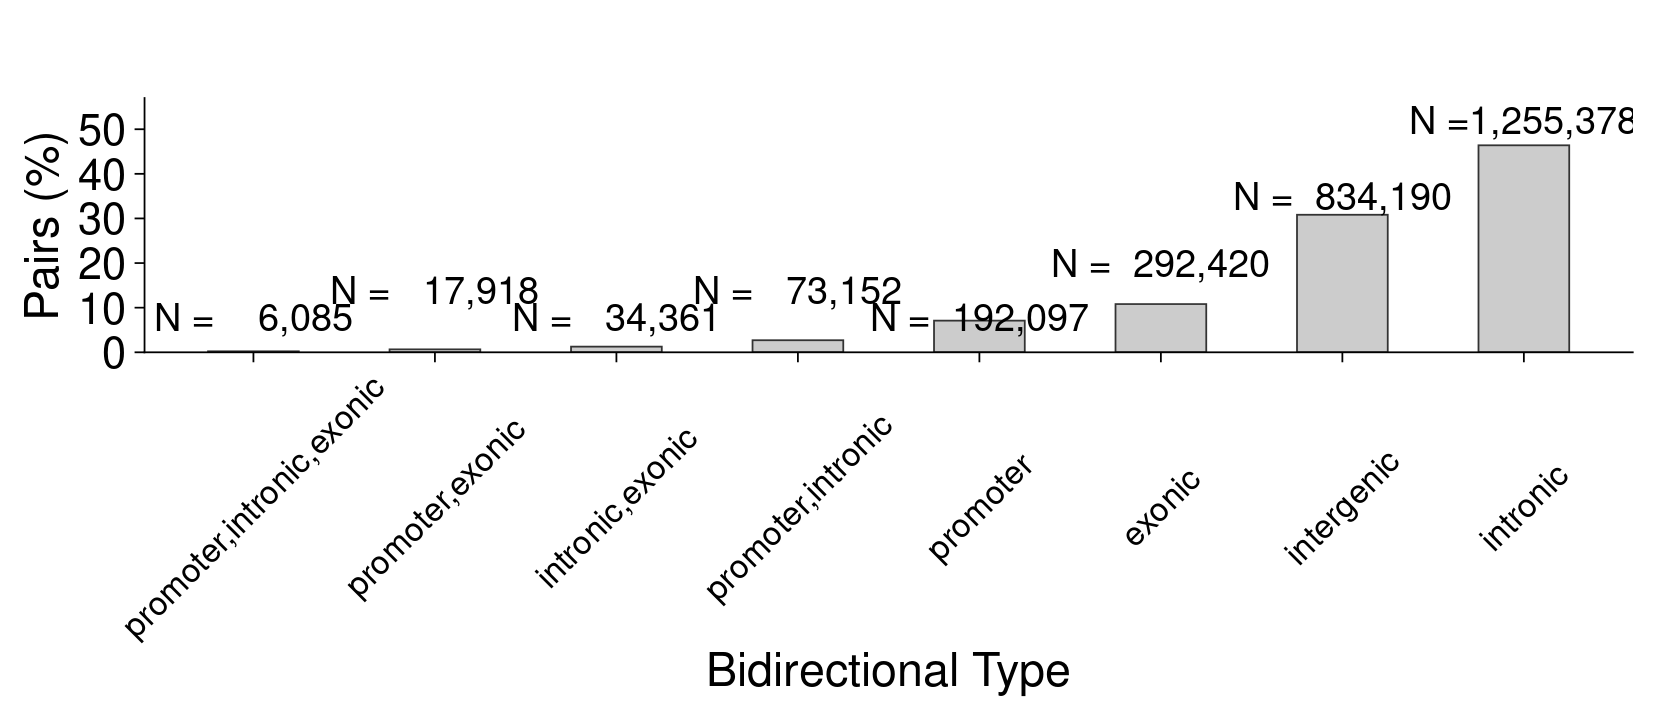

In [40]:
options(repr.plot.width=14, repr.plot.height=6)

pair_linked_summary_barplot <- ggplot(pair_linked_summary, 
                                   aes(x=reorder(Var1, Percent),
                                       y=Percent)) +
geom_bar(stat="identity",
         fill="gray80",
         width=0.5,
          color='gray20') +
labs(title = " ", 
       x = "Bidirectional Type",
       y = "Pairs (%)") +
annotate("text",
         x=c(1:nrow(pair_linked_summary)),
         #y=c(20,35,52,8,14,8,14,8), 
         y=c(8,14,8,14,8,20,35,52), 
         label= paste0("N =",format(sort(pair_linked_summary$Freq), 
       scientific = FALSE, big.mark = ',')),
         size = 8) + 
theme_cowplot(24) +
scale_y_continuous(expand = c(0,0),limits=c(0,57)) +
theme(plot.title = element_text(hjust = 0.5, face="plain"),
      title = element_text(size = 30), 
      axis.title = element_text(size = 28),
      axis.text.y = element_text(size = 26),
      axis.text.x = element_text(size = 20, angle=45, vjust=0.5, hjust=0.5)) +
theme(plot.margin = margin(0.5,1,0.5,0.5, "cm"))

pair_linked_summary_barplot

In [41]:
pair_linked_summary_top <- subset(pair_linked_summary,
                                 Var1 == "promoter" |
                                 Var1 == "exonic" |
                                 Var1 == "intergenic" |
                                 Var1 == "intronic")
pair_linked_summary_top$bidirs <- c("Exonic", "Intergenic", "Intronic","Promoter")
pair_linked_summary_top$bidirs <- factor(pair_linked_summary_top$bidirs, 
                                        levels =  c("Intronic","Intergenic","Exonic","Promoter"))
pair_linked_summary_top

,Var1,Freq,Percent,bidirs
,<fct>,<int>,<dbl>,<fct>
1,exonic,292420,10.807950,Exonic
2,intergenic,834190,30.831967,Intergenic
3,intronic,1255378,46.399229,Intronic
5,promoter,192097,7.099975,Promoter


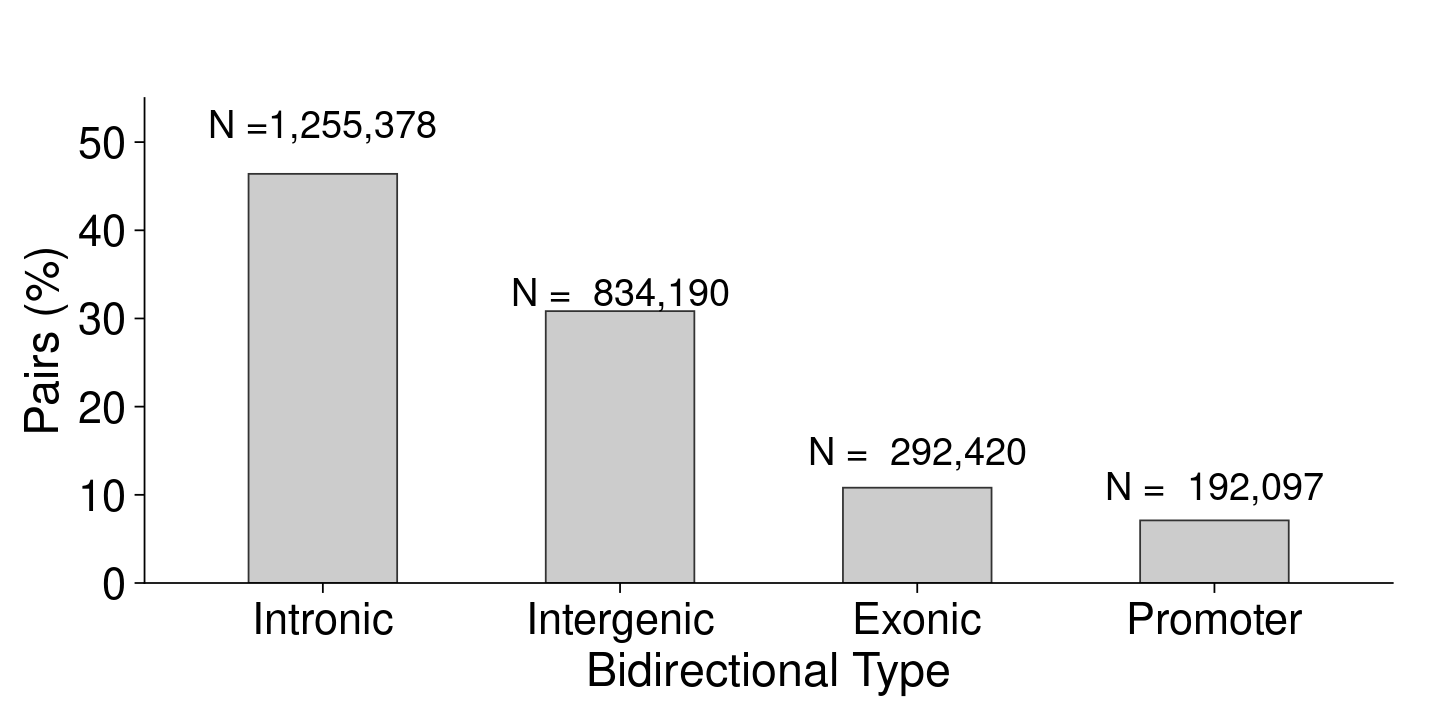

In [42]:
options(repr.plot.width=12, repr.plot.height=6)

pair_linked_summary_top_barplot <- ggplot(pair_linked_summary_top, 
                                   aes(x=bidirs,
                                       y=Percent)) +
geom_bar(stat="identity",
         fill="gray80",
         width=0.5,
          color='gray20') +
labs(title = " ", 
       x = "Bidirectional Type",
       y = "Pairs (%)") +
annotate("text", x=c(1,2,3,4),
         y=c(52,33,15,11), 
         label= paste0("N =",format(sort(pair_linked_summary_top$Freq,
                                        decreasing = TRUE), 
       scientific = FALSE, big.mark = ',')),
         size = 8) + 
theme_cowplot(24) +
scale_y_continuous(expand = c(0,0),limits=c(0,55)) +
theme(plot.title = element_text(hjust = 0.5, face="plain"),
      title = element_text(size = 30), 
      axis.title = element_text(size = 28),
      axis.text.y = element_text(size = 26),
      axis.text.x = element_text(size = 26)) +
theme(plot.margin = margin(0.5,1,0.5,0.5, "cm"))

pair_linked_summary_top_barplot

In [43]:
##total pairs and location of bidirectional transcripts
bidir_linked_summary <- as.data.frame(table(unique(corr_sig_DT_unique_loop_txptype[,c("transcript_2","bidirectional_transcript_type")])$bidirectional_transcript_type))
bidir_linked_summary$Percent <- 100*(bidir_linked_summary$Freq/sum(bidir_linked_summary$Freq))
bidir_linked_summary


Var1,Freq,Percent
<fct>,<int>,<dbl>
exonic,20231,5.9253206
intergenic,138076,40.4401449
intronic,159303,46.6571773
"intronic,exonic",2864,0.8388176
promoter,13519,3.9594884
"promoter,exonic",1066,0.3122135
"promoter,intronic",5938,1.7391406
"promoter,intronic,exonic",436,0.1276971


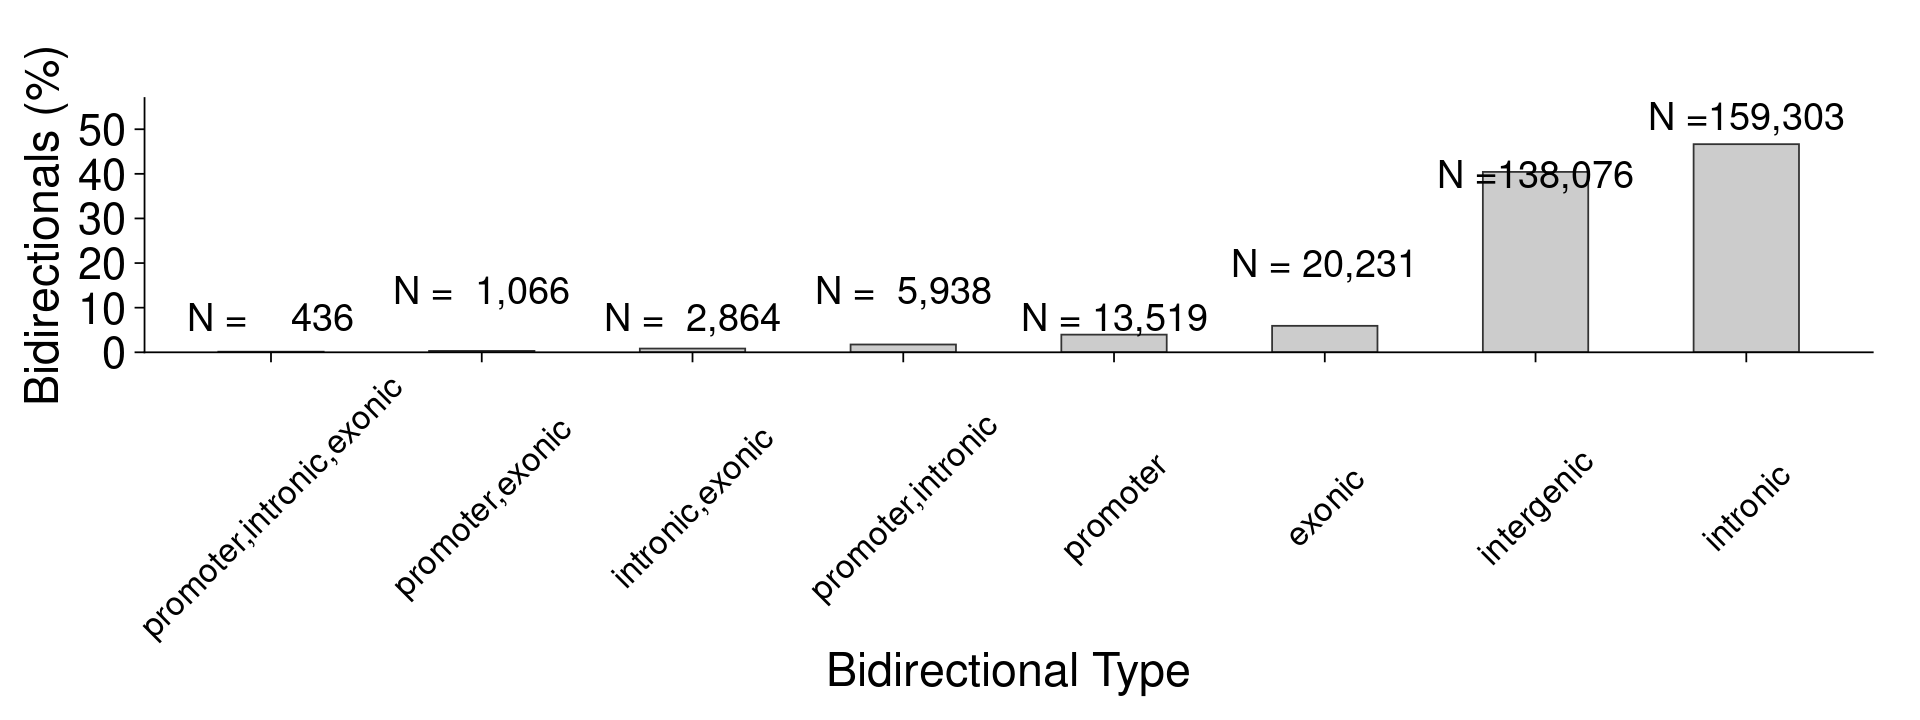

In [44]:
options(repr.plot.width=16, repr.plot.height=6)

bidir_linked_summary_barplot <- ggplot(bidir_linked_summary, 
                                   aes(x=reorder(Var1, Percent),
                                       y=Percent)) +
geom_bar(stat="identity",
         fill="gray80",
         width=0.5,
          color='gray20') +
labs(title = " ", 
       x = "Bidirectional Type",
       y = "Bidirectionals (%)") +
annotate("text",
         x=c(1:nrow(bidir_linked_summary)),
         #y=c(20,35,52,8,14,8,14,8), 
         y=c(8,14,8,14,8,20,40,53), 
         label= paste0("N =",format(sort(bidir_linked_summary$Freq), 
       scientific = FALSE, big.mark = ',')),
         size = 8) + 
theme_cowplot(24) +
scale_y_continuous(expand = c(0,0),limits=c(0,57)) +
theme(plot.title = element_text(hjust = 0.5, face="plain"),
      title = element_text(size = 30), 
      axis.title = element_text(size = 28),
      axis.text.y = element_text(size = 26),
      axis.text.x = element_text(size = 20, angle=45, vjust=0.5, hjust=0.5)) +
theme(plot.margin = margin(0.5,1,0.5,0.5, "cm"))

bidir_linked_summary_barplot

In [45]:
##total pairs and location of bidirectional transcripts
gene_linked_summary <- as.data.frame(table(unique(corr_sig_DT_unique_loop_txptype[,c("transcript_1","gene_transcript_type")])$gene_transcript_type))
gene_linked_summary$Percent <- 100*(gene_linked_summary$Freq/sum(gene_linked_summary$Freq))
gene_linked_summary

Var1,Freq,Percent
<fct>,<int>,<dbl>
coding,16422,72.97694
noncoding,6081,27.02306


## Split pairs into categories

In [46]:
unique(corr_sig_DT_unique_loop_txptype$bidirectional_transcript_type)

[1] "intronic"                 "exonic"                  
[3] "intergenic"               "intronic,exonic"         
[5] "promoter"                 "promoter,intronic"       
[7] "promoter,exonic"          "promoter,intronic,exonic"

In [47]:
#subset intragenic bidirectionals
corr_sig_DT_unique_loop_intra <- subset(corr_sig_DT_unique_loop_txptype, 
                                        bidirectional_transcript_type!= "intergenic" & 
                                       bidirectional_transcript_type!= "promoter")
dim(corr_sig_DT_unique_loop_intra)

[1] 1679314       7

In [48]:
#subset intergenic bidirectionals
corr_sig_DT_unique_loop_inter <- subset(corr_sig_DT_unique_loop_txptype, 
                                        bidirectional_transcript_type=="intergenic")
dim(corr_sig_DT_unique_loop_inter)

[1] 834190      7

In [49]:
#subset promoter bidirectionals
corr_sig_DT_unique_loop_prom <- subset(corr_sig_DT_unique_loop_txptype,
                                       bidirectional_transcript_type== "promoter")
dim(corr_sig_DT_unique_loop_prom)

[1] 192097      7

## Intragenic bidirectionals



### Linked to overlapping gene

In [50]:
#1: get significant paired genes and bidirectionals
paired_genes <- unique(corr_sig_DT_unique_loop_txptype$transcript_1)

paired_bidir <- unique(corr_sig_DT_unique_loop_txptype$transcript_2)

#2: get genes and bidirectional regions that overlap with significant and paired transcripts
bidir_overlaps_paired <- bidir_overlaps[bidir_overlaps$gene_id %in% paired_genes | 
                                        bidir_overlaps$bidirs %in% paired_bidir,]

#3: get pairs where the gene and bidirectional transcript overlap
corr_sig_DT_unique_in_gene <- corr_sig_DT_unique_loop_intra[corr_sig_DT_unique_loop_intra$pair_id %in% 
                                                 bidir_overlaps_paired$pair_id,]

length(unique(corr_sig_DT_unique_in_gene$pair_id))

[1] 28182

In [51]:
##check all bidirectionals are intragenic
print("Bidirectional types")
unique(corr_sig_DT_unique_in_gene$bidirectional_location)


corr_sig_DT_unique_in_gene_bidircount <- as.data.frame(table(unique(corr_sig_DT_unique_in_gene[,c("transcript_2","bidirectional_transcript_type")])$bidirectional_transcript_type))
corr_sig_DT_unique_in_gene_bidircount

[1] "Bidirectional types"


[1] "intragenic"

Var1,Freq
<fct>,<int>
exonic,4586
intronic,21236
"intronic,exonic",514
"promoter,exonic",298
"promoter,intronic",1063
"promoter,intronic,exonic",79


In [54]:
length(unique(corr_sig_DT_unique_loop_intra$pair_id))

[1] 1679314

In [55]:
100*(28182/1679314)

[1] 1.678185

In [53]:
print(paste0("Number of INTRA pairs linked with overlapping transcripts = ", 
            length(unique(corr_sig_DT_unique_in_gene$pair_id))))

print(paste0("Percent of INTRA pairs linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_in_gene$pair_id))/length(unique(corr_sig_DT_unique_loop_intra$pair_id)))*100,
            "%"))

print(paste0("Percent of ALL pairs linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_in_gene$pair_id))/length(unique(corr_sig_DT_unique_loop_txptype$pair_id)))*100,
            "%"))

[1] "Number of INTRA pairs linked with overlapping transcripts = 28182"
[1] "Percent of INTRA pairs linked with overlapping transcripts = 1.67818525898075%"
[1] "Percent of ALL pairs linked with overlapping transcripts = 1.04161700117645%"


In [56]:
print(paste("Genes correlated with overlapping bidirectionals = ", 
            length(unique(corr_sig_DT_unique_in_gene$transcript_1))))

print(paste("Bidirectionals correlated with overlapping gene = ", 
            length(unique(corr_sig_DT_unique_in_gene$transcript_2))))

[1] "Genes correlated with overlapping bidirectionals =  6922"
[1] "Bidirectionals correlated with overlapping gene =  27776"


In [61]:
num_bidirs_overlapping_gene_bidir <- as.data.frame(table(unique(corr_sig_DT_unique_in_gene[,c("transcript_1", "pair_id")])$transcript_1)) 
max(num_bidirs_overlapping_gene_bidir$Freq)
subset(num_bidirs_overlapping_gene_bidir, Freq >50)

[1] 56

,Var1,Freq
,<fct>,<int>
3579,LRBA:NM_001199282.2,56
4975,RAD51B:NM_001321819.1,53


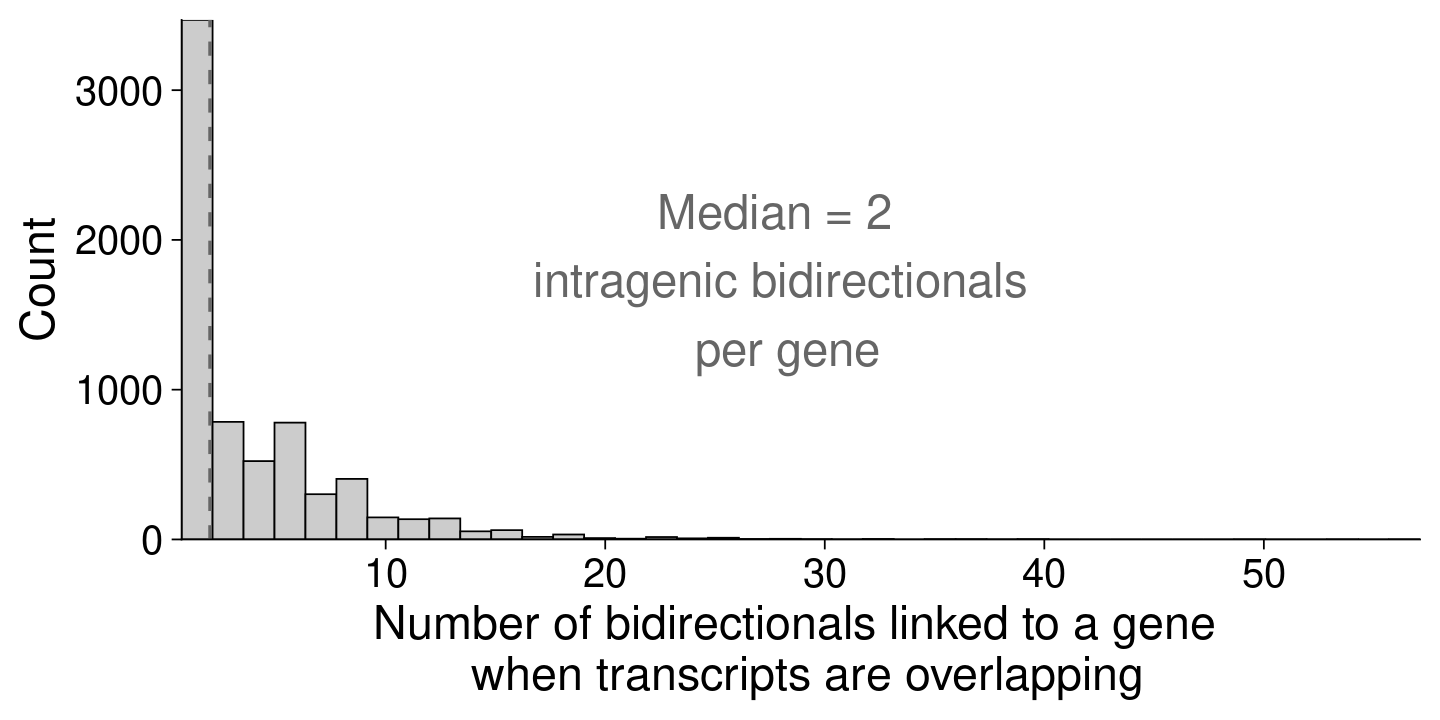

In [62]:
options(repr.plot.width=12, repr.plot.height=6)

num_bidirs_per_gene_intragenic_overlap_plot <- ggplot(num_bidirs_overlapping_gene_bidir, aes(x = Freq)) + 
geom_histogram(color="black", fill="gray80", bins=40) +
theme_cowplot(24) + 
geom_vline(xintercept = median(num_bidirs_overlapping_gene_bidir$Freq),
           linetype="dashed", 
           color = "gray40", 
           linewidth=1) +
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
xlab("Number of bidirectionals linked to a gene \n when transcripts are overlapping") +
ylab("Count") +
theme(plot.title = element_text(hjust = 0.5)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 28), 
      axis.text.x = element_text(size = 24),
      axis.text.y = element_text(size = 24)) 

num_bidirs_per_gene_intragenic_overlap_plot2 <- num_bidirs_per_gene_intragenic_overlap_plot + annotate(geom="text", 
                                          x=round(0.5*max(num_bidirs_overlapping_gene_bidir$Freq)), 
                                          y=round(0.5*max(ggplot_build(num_bidirs_per_gene_intragenic_overlap_plot)$data[[1]]$count)), 
                                          size=10,
                                          label=paste0("Median = ", 
                                                       round(median(num_bidirs_overlapping_gene_bidir$Freq)),
                                                      " \n intragenic bidirectionals \n per gene"),
                                          color="gray40")

num_bidirs_per_gene_intragenic_overlap_plot2

### NOT Linked to overlapping gene

In [63]:
head(corr_sig_DT_unique_in_gene, 3)

transcript_1,transcript_2,transcript1_chrom,pair_id,bidirectional_location,bidirectional_transcript_type,gene_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1BG:NM_130786.4,chr19:58345630-58345900,chr19,A1BG:NM_130786.4~chr19:58345630-58345900,intragenic,exonic,coding
A1BG:NM_130786.4,chr19:58346260-58346590,chr19,A1BG:NM_130786.4~chr19:58346260-58346590,intragenic,exonic,coding
A1BG:NM_130786.4,chr19:58347362-58347982,chr19,A1BG:NM_130786.4~chr19:58347362-58347982,intragenic,intronic,coding


In [64]:
#3: get pairs where the gene and bidirectional transcript DO NOT overlap
corr_sig_DT_unique_not_in_gene <- corr_sig_DT_unique_loop_intra[!corr_sig_DT_unique_loop_intra$pair_id %in% 
                                                                corr_sig_DT_unique_in_gene$pair_id,]
                                                           #bidir_overlaps_paired$pair_id,]
length(unique(corr_sig_DT_unique_not_in_gene$pair_id))

[1] 1651132

In [55]:
#corr_sig_DT_unique_not_in_gene <- corr_sig_DT_unique_loop_intra[!corr_sig_DT_unique_loop_intra$pair_id %in% 
#                                                           bidir_overlaps_paired$pair_id,]
#length(unique(corr_sig_DT_unique_not_in_gene$pair_id))

In [65]:
##check all bidirectionals are intragenic
print("Bidirectional types")

as.data.frame(table(unique(corr_sig_DT_unique_not_in_gene[,c("transcript_2","bidirectional_transcript_type")])$bidirectional_transcript_type))


[1] "Bidirectional types"


Var1,Freq
<fct>,<int>
exonic,20072
intronic,157223
"intronic,exonic",2841
"promoter,exonic",1056
"promoter,intronic",5900
"promoter,intronic,exonic",429


In [66]:
print(paste0("Percent of INTRAGENIC pairs NOT linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_not_in_gene$pair_id))/length(unique(corr_sig_DT_unique_loop_intra$pair_id)))*100,
            "%"))

print(paste0("Percent of ALL pairs NOT linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_not_in_gene$pair_id))/length(unique(corr_sig_DT_unique_loop_txptype$pair_id)))*100,
            "%"))

[1] "Percent of INTRAGENIC pairs NOT linked with overlapping transcripts = 98.3218147410193%"
[1] "Percent of ALL pairs NOT linked with overlapping transcripts = 61.026441075384%"


### Number of transcript summaries

In [67]:
print(paste0("Number of INTRAGENIC bidirectional regions paired with overlapping gene = ", 
            (length(unique(corr_sig_DT_unique_in_gene$transcript_2))))) ##was 40675

print(paste0("Percent of INTRAGENIC bidirectional regions paired with overlapping gene = ", 
            (length(unique(corr_sig_DT_unique_in_gene$transcript_2))/length(unique(corr_sig_DT_unique_loop_intra$transcript_2)))*100,
            "%")) ##was 26.82

print(paste0("Percent of ALL bidirectional regions paired with overlapping gene = ", 
            (length(unique(corr_sig_DT_unique_in_gene$transcript_2))/length(unique(corr_sig_DT_unique_loop_txptype$transcript_2)))*100,
            "%")) ##was 15.84

[1] "Number of INTRAGENIC bidirectional regions paired with overlapping gene = 27776"
[1] "Percent of INTRAGENIC bidirectional regions paired with overlapping gene = 14.6314225813588%"
[1] "Percent of ALL bidirectional regions paired with overlapping gene = 8.13512460717037%"


In [68]:
##The reason the numbers do not add up is because the above filters were done
##using the pairs (i.e. gene-bidirectional) not in the overlapping bed file./
##So, there could be transcripts where they do 
print(paste0("Number of INTRAGENIC bidirectional regions NOT paired with overlapping gene = ", 
            (length(unique(c(corr_sig_DT_unique_not_in_gene$transcript_2))))))

print(paste0("Percent of INTRAGENIC bidirectional regions NOT paired with overlapping gene = ", 
            (length(unique(c(corr_sig_DT_unique_not_in_gene$transcript_2)))/length(unique(corr_sig_DT_unique_loop_intra$transcript_2)))*100,
            "%"))

print(paste0("Percent of ALL bidirectional regions NOT paired with overlapping gene = ", 
            (length(unique(corr_sig_DT_unique_not_in_gene$transcript_2))/length(unique(corr_sig_DT_unique_loop_txptype$transcript_2)))*100,
            "%"))

[1] "Number of INTRAGENIC bidirectional regions NOT paired with overlapping gene = 187521"
[1] "Percent of INTRAGENIC bidirectional regions NOT paired with overlapping gene = 98.7794856667264%"
[1] "Percent of ALL bidirectional regions NOT paired with overlapping gene = 54.9217562450027%"


## Intergenic bidirectionals

In [69]:
corr_sig_DT_unique_inter_closest <- corr_sig_DT_unique_loop_inter[corr_sig_DT_unique_loop_inter$pair_id %in%
                                                             bidir_gene_dist$pair_id,]
nrow(corr_sig_DT_unique_inter_closest)
head(corr_sig_DT_unique_inter_closest, 3)

[1] 20984

transcript_1,transcript_2,transcript1_chrom,pair_id,bidirectional_location,bidirectional_transcript_type,gene_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1BG-AS1:NR_015380.2,chr19:58343879-58344249,chr19,A1BG-AS1:NR_015380.2~chr19:58343879-58344249,intergenic,intergenic,noncoding
A3GALT2:NM_001080438.1,chr1:33300941-33302057,chr1,A3GALT2:NM_001080438.1~chr1:33300941-33302057,intergenic,intergenic,coding
A3GALT2:NM_001080438.1,chr1:33302057-33302621,chr1,A3GALT2:NM_001080438.1~chr1:33302057-33302621,intergenic,intergenic,coding


In [70]:
print(paste0("Number of INTERGENIC pairs linked with overlapping transcripts = ", 
            length(unique(corr_sig_DT_unique_inter_closest$pair_id))))

print(paste0("Percent of INTERGENIC pairs linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_inter_closest$pair_id))/length(unique(corr_sig_DT_unique_loop_inter$pair_id)))*100,
            "%"))

print(paste0("Percent of ALL pairs linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_inter_closest$pair_id))/length(unique(corr_sig_DT_unique_loop_txptype$pair_id)))*100,
            "%"))

[1] "Number of INTERGENIC pairs linked with overlapping transcripts = 20984"
[1] "Percent of INTERGENIC pairs linked with overlapping transcripts = 2.51549407209389%"
[1] "Percent of ALL pairs linked with overlapping transcripts = 0.775576295248265%"


In [71]:
print(paste0("Number of INTERGENIC bidirectional regions paired with closest gene = ", 
            (length(unique(corr_sig_DT_unique_inter_closest$transcript_2)))))

print(paste0("Percent of INTERGENIC bidirectional regions paired with closest gene = ", 
            (length(unique(corr_sig_DT_unique_inter_closest$transcript_2))/length(unique(corr_sig_DT_unique_loop_inter$transcript_2)))*100,
            "%"))

print(paste0("Percent of ALL bidirectional regions paired with closest gene = ", 
            (length(unique(corr_sig_DT_unique_inter_closest$transcript_2))/length(unique(corr_sig_DT_unique_loop_txptype$transcript_2)))*100,
            "%"))

[1] "Number of INTERGENIC bidirectional regions paired with closest gene = 20953"
[1] "Percent of INTERGENIC bidirectional regions paired with closest gene = 15.1749761001188%"
[1] "Percent of ALL bidirectional regions paired with closest gene = 6.13678232625435%"


In [72]:
print(paste("Genes correlated with closest bidirectionals = ", 
            length(unique(corr_sig_DT_unique_inter_closest$transcript_1))))

print(paste("Bidirectionals correlated with closest gene = ", 
            length(unique(corr_sig_DT_unique_inter_closest$transcript_2))))

[1] "Genes correlated with closest bidirectionals =  4711"
[1] "Bidirectionals correlated with closest gene =  20953"


## Promoter bidirectionals

In [73]:
corr_sig_DT_unique_prom_closest <- corr_sig_DT_unique_loop_prom[corr_sig_DT_unique_loop_prom$pair_id %in%
                                                             bidir_gene_dist$pair_id,]
nrow(corr_sig_DT_unique_prom_closest)

[1] 2823

In [74]:
print(paste0("Number of PROMOTER pairs linked with overlapping transcripts = ", 
            length(unique(corr_sig_DT_unique_prom_closest$pair_id))))

print(paste0("Percent of PROMOTER pairs linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_prom_closest$pair_id))/length(unique(corr_sig_DT_unique_loop_prom$pair_id)))*100,
            "%"))

print(paste0("Percent of ALL pairs linked with overlapping transcripts = ", 
            (length(unique(corr_sig_DT_unique_prom_closest$pair_id))/length(unique(corr_sig_DT_unique_loop_txptype$pair_id)))*100,
            "%"))

[1] "Number of PROMOTER pairs linked with overlapping transcripts = 2823"
[1] "Percent of PROMOTER pairs linked with overlapping transcripts = 1.46957006095879%"
[1] "Percent of ALL pairs linked with overlapping transcripts = 0.10433910986875%"


In [75]:
print(paste0("Number of PROMOTER bidirectional regions paired with closest gene = ", 
            (length(unique(corr_sig_DT_unique_prom_closest$transcript_2)))))

print(paste0("Percent of PROMOTER bidirectional regions paired with closest gene = ", 
            (length(unique(corr_sig_DT_unique_prom_closest$transcript_2))/length(unique(corr_sig_DT_unique_loop_prom$transcript_2)))*100,
            "%"))

print(paste0("Percent of ALL bidirectional regions paired with closest gene = ", 
            (length(unique(corr_sig_DT_unique_prom_closest$transcript_2))/length(unique(corr_sig_DT_unique_loop_txptype$transcript_2)))*100,
            "%"))

[1] "Number of PROMOTER bidirectional regions paired with closest gene = 2806"
[1] "Percent of PROMOTER bidirectional regions paired with closest gene = 20.7559730749316%"
[1] "Percent of ALL bidirectional regions paired with closest gene = 0.821830344459967%"


In [76]:
print(paste("Genes correlated with closest bidirectionals = ", 
            length(unique(corr_sig_DT_unique_prom_closest$transcript_1))))

print(paste("Bidirectionals correlated with closest gene = ", 
            length(unique(corr_sig_DT_unique_prom_closest$transcript_2))))

[1] "Genes correlated with closest bidirectionals =  2400"
[1] "Bidirectionals correlated with closest gene =  2806"


## Plot all closest gene assignments 

In [77]:
closest_assignments <- rbind(corr_sig_DT_unique_in_gene,
                             corr_sig_DT_unique_inter_closest,
                             corr_sig_DT_unique_prom_closest)
dim(closest_assignments)

[1] 51989     7

In [78]:
print(paste("Number of pairs where genes are linked to closest bidirectional ",
            length(unique(closest_assignments$pair_id))))

print(paste("Percent of pairs where genes are linked to closest bidirectional ",
            100*(length(unique(closest_assignments$pair_id))/length(unique(corr_sig_DT_unique_loop_txptype$pair_id))),
            "%"))

[1] "Number of pairs where genes are linked to closest bidirectional  51989"
[1] "Percent of pairs where genes are linked to closest bidirectional  1.92153240629346 %"


In [79]:
print(paste("Number of bidirectionas where genes are linked to closest bidirectional ",
            length(unique(closest_assignments$transcript_2))))

print(paste("Percent of pairs where genes are linked to closest bidirectional ",
            100*(length(unique(closest_assignments$transcript_2))/length(unique(corr_sig_DT_unique_loop_txptype$transcript_2))),
            "%"))

[1] "Number of bidirectionas where genes are linked to closest bidirectional  51535"
[1] "Percent of pairs where genes are linked to closest bidirectional  15.0937372778847 %"


In [80]:
gene_linked_close_summary <- as.data.frame(table(unique(closest_assignments[,c("transcript_1","gene_transcript_type")])$gene_transcript_type))
gene_linked_close_summary$Total <- gene_linked_summary$Freq
gene_linked_close_summary$Percent_total <- 100*(gene_linked_close_summary$Freq/sum(gene_linked_summary$Freq))
gene_linked_close_summary$Percent_category <- 100*(gene_linked_close_summary$Freq/gene_linked_summary$Freq)
gene_linked_close_summary

Var1,Freq,Total,Percent_total,Percent_category
<fct>,<int>,<int>,<dbl>,<dbl>
coding,5920,16422,26.30760,36.04920
noncoding,2861,6081,12.71386,47.04818


In [81]:
gene_linked_summary

Var1,Freq,Percent
<fct>,<int>,<dbl>
coding,16422,72.97694
noncoding,6081,27.02306


In [82]:
length(unique(corr_sig_DT_unique_loop_prom$transcript_2))

[1] 13519

In [83]:
length(unique(closest_assignments$transcript_2))/length(unique(corr_sig_DT_unique_loop_txptype$transcript_2))

[1] 0.1509374

In [84]:
length(unique(corr_sig_DT_unique_prom_closest$transcript_2))/length(unique(corr_sig_DT_unique_loop_prom$transcript_2))

[1] 0.2075597

In [86]:
corr_sig_DT_unique_prom_NOT_closest <- corr_sig_DT_unique_loop_prom[!corr_sig_DT_unique_loop_prom$transcript_2 %in%
                                                                       corr_sig_DT_unique_prom_closest$transcript_2,
                                                                      ]
dim(corr_sig_DT_unique_prom_NOT_closest)
head(corr_sig_DT_unique_prom_NOT_closest, 3)

[1] 141591      7

transcript_1,transcript_2,transcript1_chrom,pair_id,bidirectional_location,bidirectional_transcript_type,gene_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1BG-AS1:NR_015380.2,chr19:57727481-57727803,chr19,A1BG-AS1:NR_015380.2~chr19:57727481-57727803,intragenic,promoter,noncoding
A1BG-AS1:NR_015380.2,chr19:57746643-57746891,chr19,A1BG-AS1:NR_015380.2~chr19:57746643-57746891,intragenic,promoter,noncoding
A1BG-AS1:NR_015380.2,chr19:57814774-57815068,chr19,A1BG-AS1:NR_015380.2~chr19:57814774-57815068,intragenic,promoter,noncoding


In [87]:
length(unique(corr_sig_DT_unique_prom_NOT_closest$transcript_2))

[1] 10713

In [88]:
length(unique(corr_sig_DT_unique_prom_closest$transcript_2))

[1] 2806

In [89]:
length(unique(corr_sig_DT_unique_loop_prom$transcript_2))

[1] 13519

In [90]:
head(corr_sig_DT_unique_prom_NOT_closest, 3)

transcript_1,transcript_2,transcript1_chrom,pair_id,bidirectional_location,bidirectional_transcript_type,gene_transcript_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1BG-AS1:NR_015380.2,chr19:57727481-57727803,chr19,A1BG-AS1:NR_015380.2~chr19:57727481-57727803,intragenic,promoter,noncoding
A1BG-AS1:NR_015380.2,chr19:57746643-57746891,chr19,A1BG-AS1:NR_015380.2~chr19:57746643-57746891,intragenic,promoter,noncoding
A1BG-AS1:NR_015380.2,chr19:57814774-57815068,chr19,A1BG-AS1:NR_015380.2~chr19:57814774-57815068,intragenic,promoter,noncoding


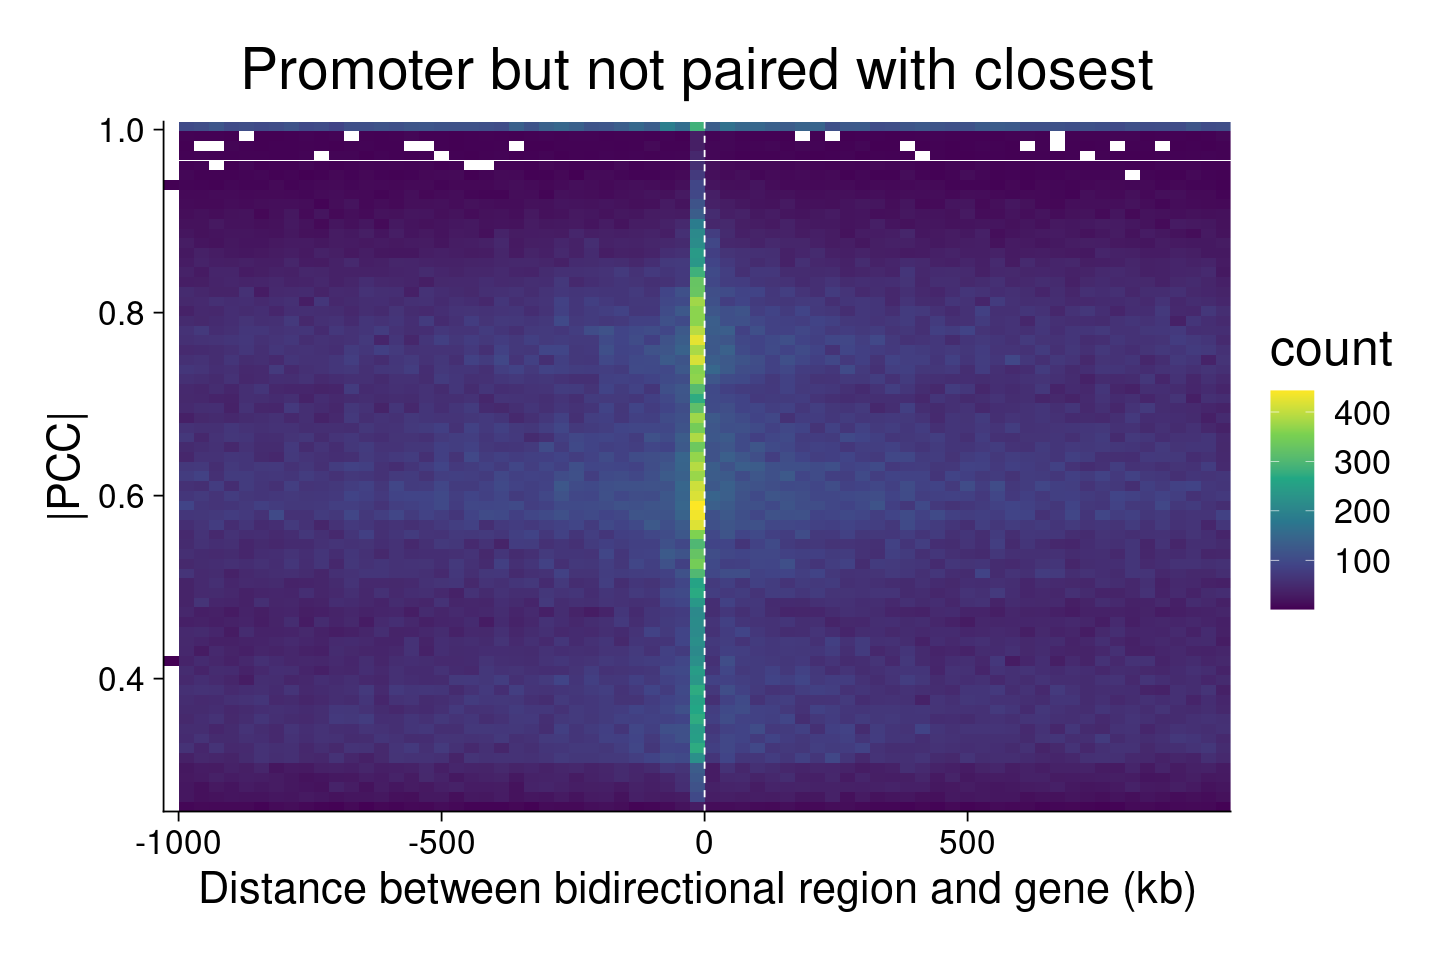

In [91]:
options(repr.plot.width=12, repr.plot.height=8)

prom_not_closest <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                   corr_sig_DT_unique_prom_NOT_closest$pair_id,], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 70) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "white", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Promoter but not paired with closest") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

prom_not_closest

Warning message:
“Removed 265973 rows containing non-finite outside the scale range
(`stat_bin2d()`).”
Warning message:
“Removed 77 rows containing missing values or values outside the scale range
(`geom_tile()`).”


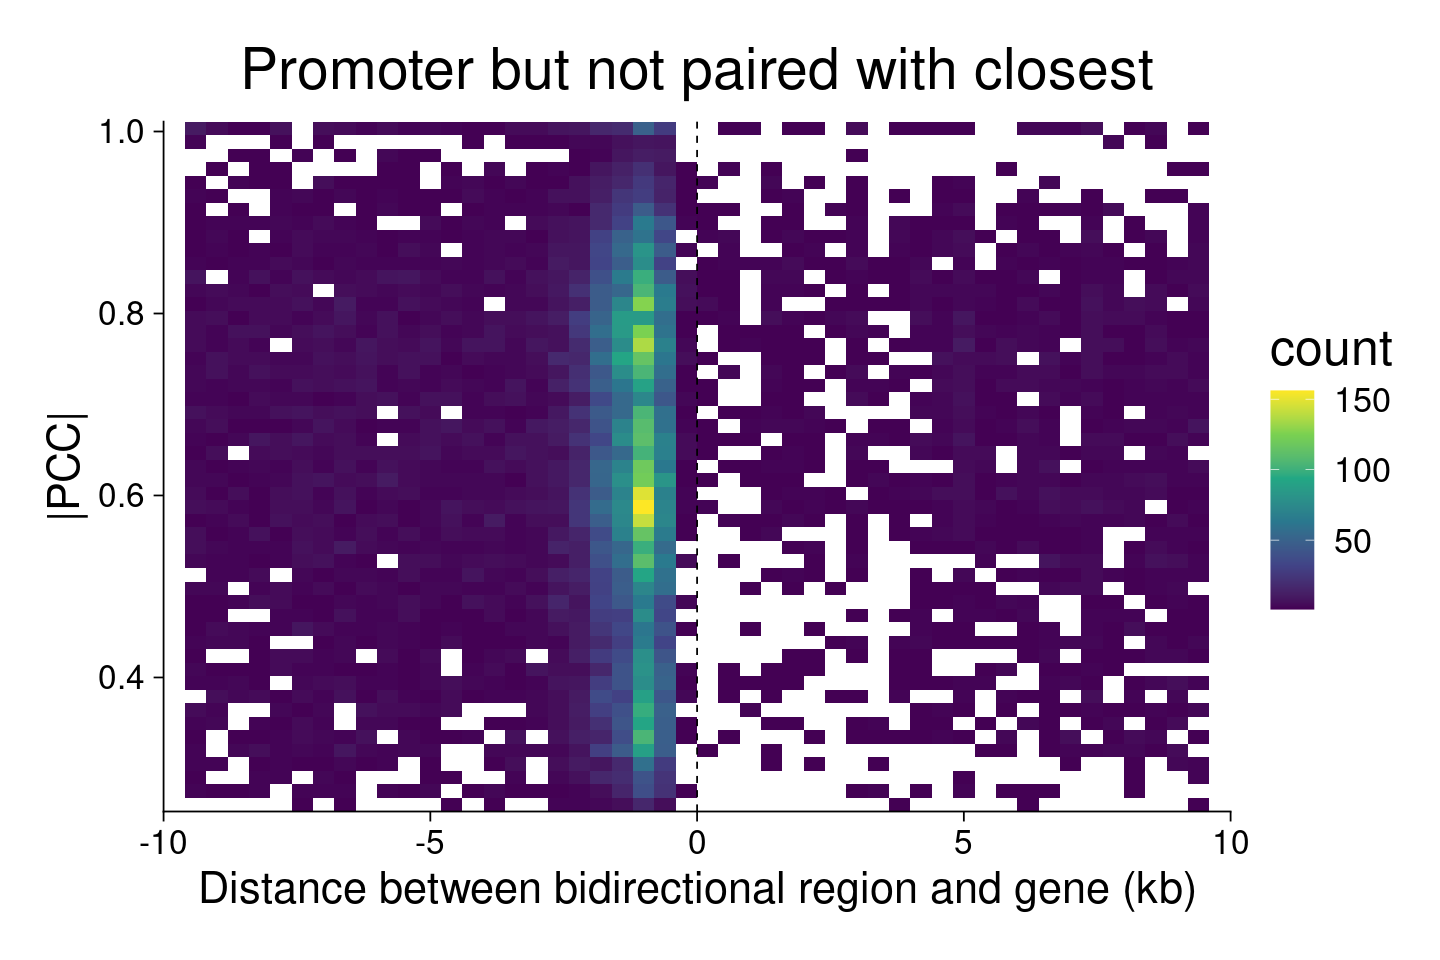

In [92]:
options(repr.plot.width=12, repr.plot.height=8)

prom_not_closest_zoom <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                   corr_sig_DT_unique_prom_NOT_closest$pair_id,], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "black", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0), limits=c(-10, 10)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Promoter but not paired with closest") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

prom_not_closest_zoom

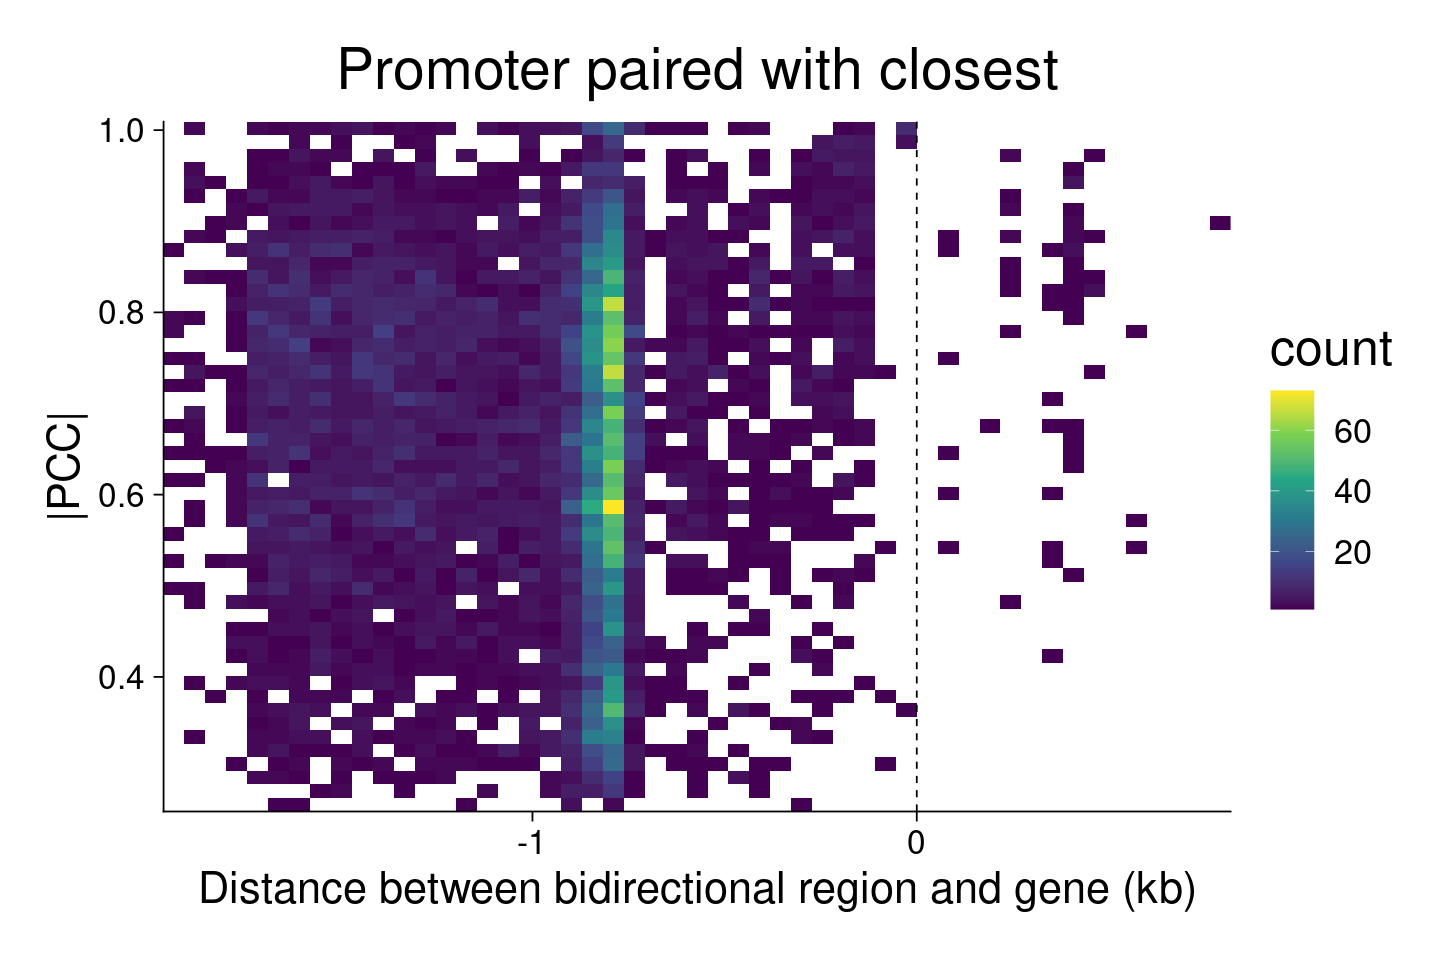

In [93]:
options(repr.plot.width=12, repr.plot.height=8)

prom_closest <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                   corr_sig_DT_unique_prom_closest$pair_id,], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "black", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Promoter paired with closest") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

prom_closest

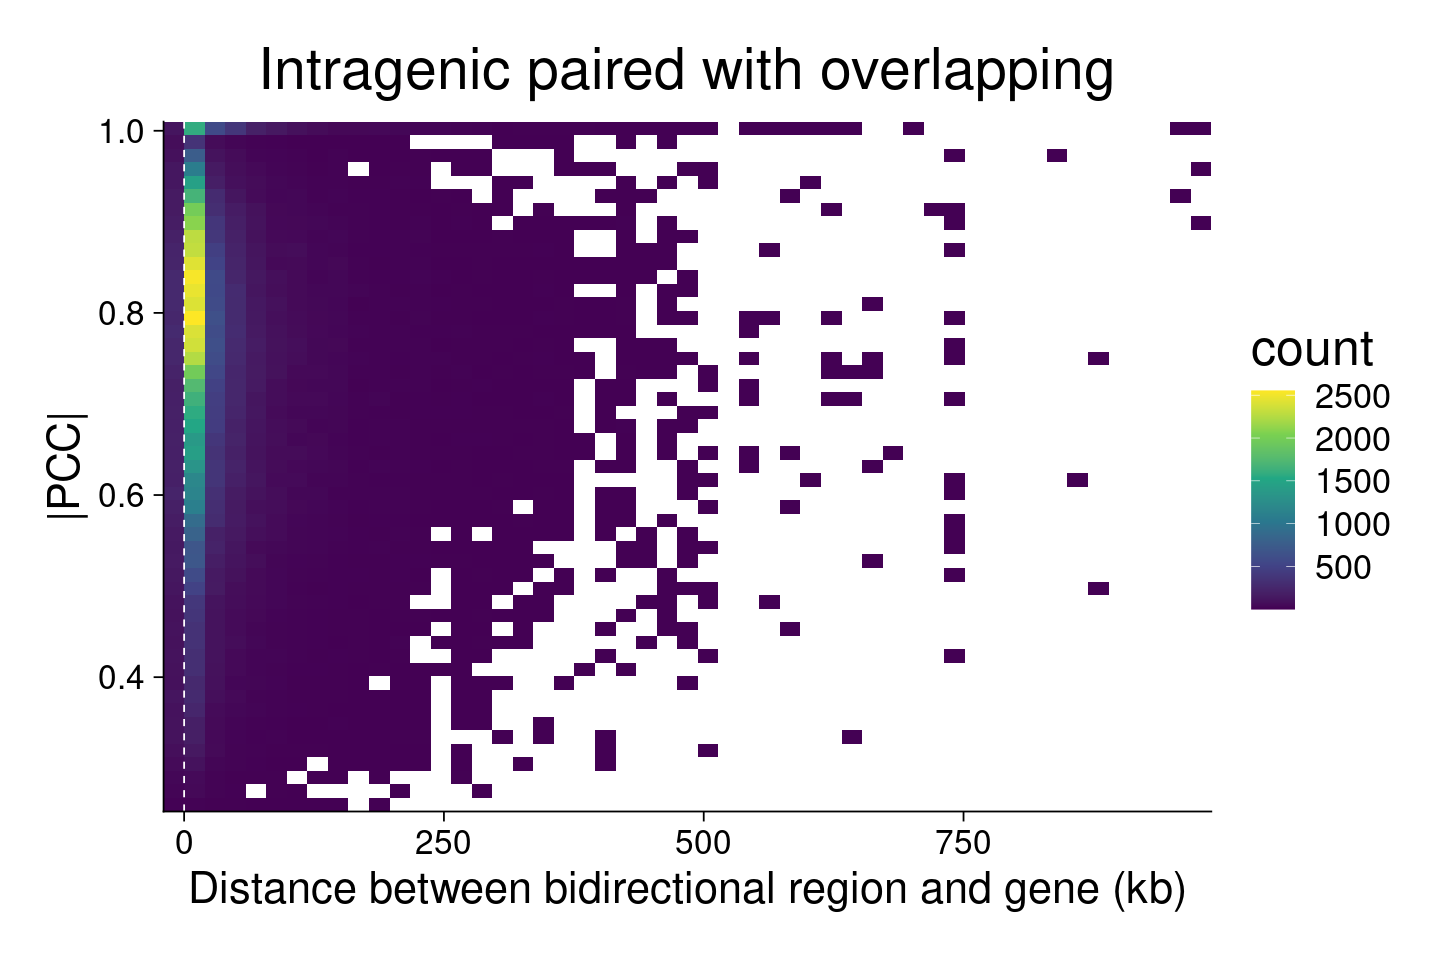

In [94]:
options(repr.plot.width=12, repr.plot.height=8)

intra_closest <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                         corr_sig_DT_unique_in_gene$pair_id,], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "white", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Intragenic paired with overlapping") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

intra_closest

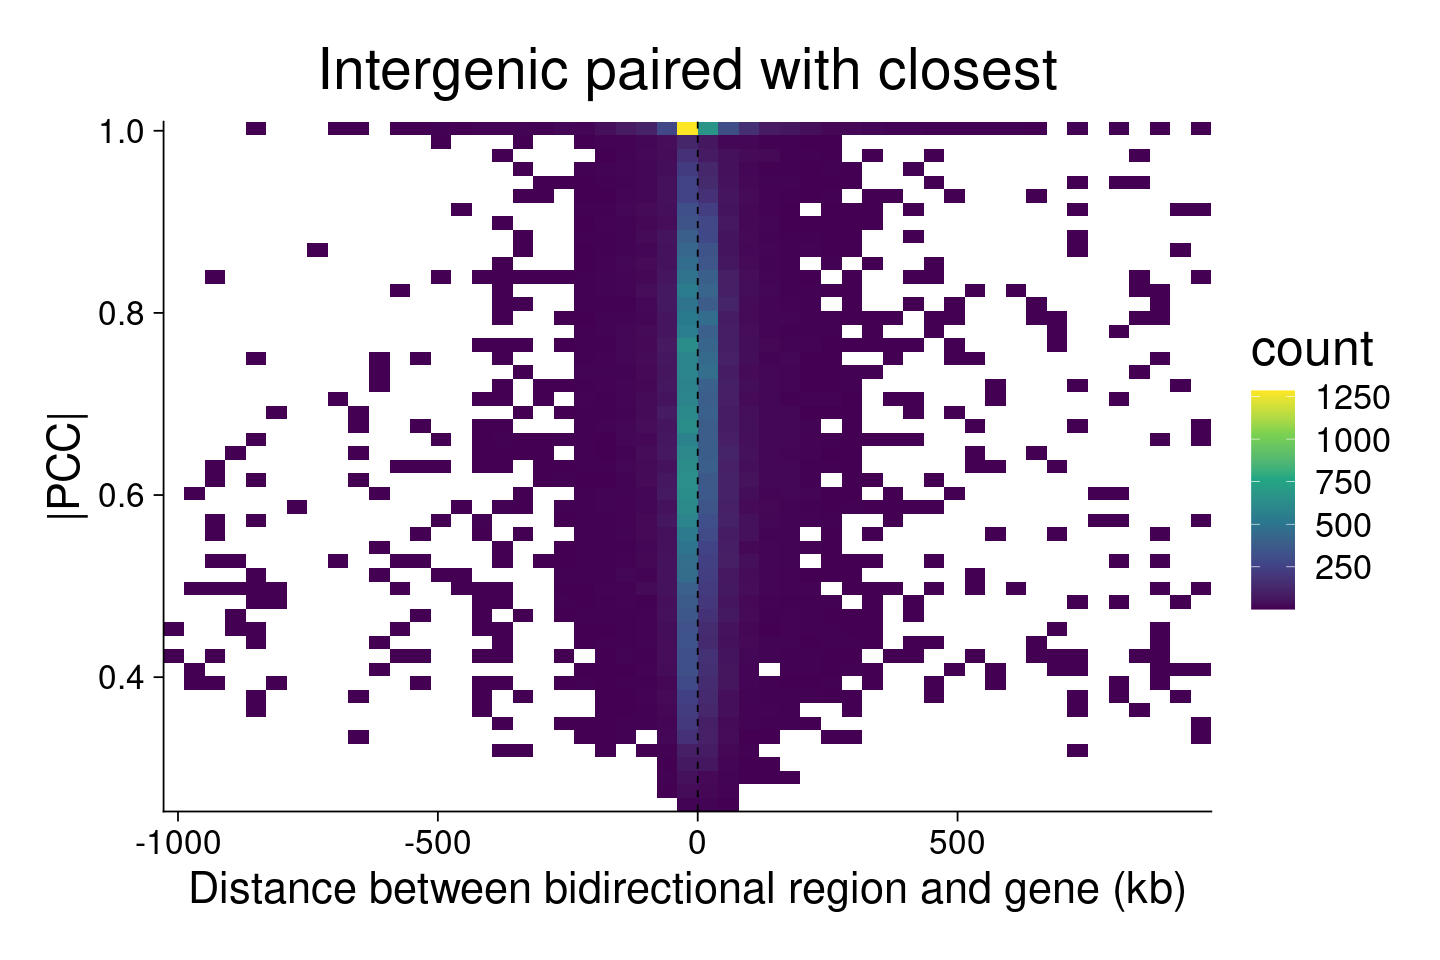

In [95]:
options(repr.plot.width=12, repr.plot.height=8)

inter_closest <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                         corr_sig_DT_unique_inter_closest$pair_id,], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "black", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Intergenic paired with closest") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

inter_closest

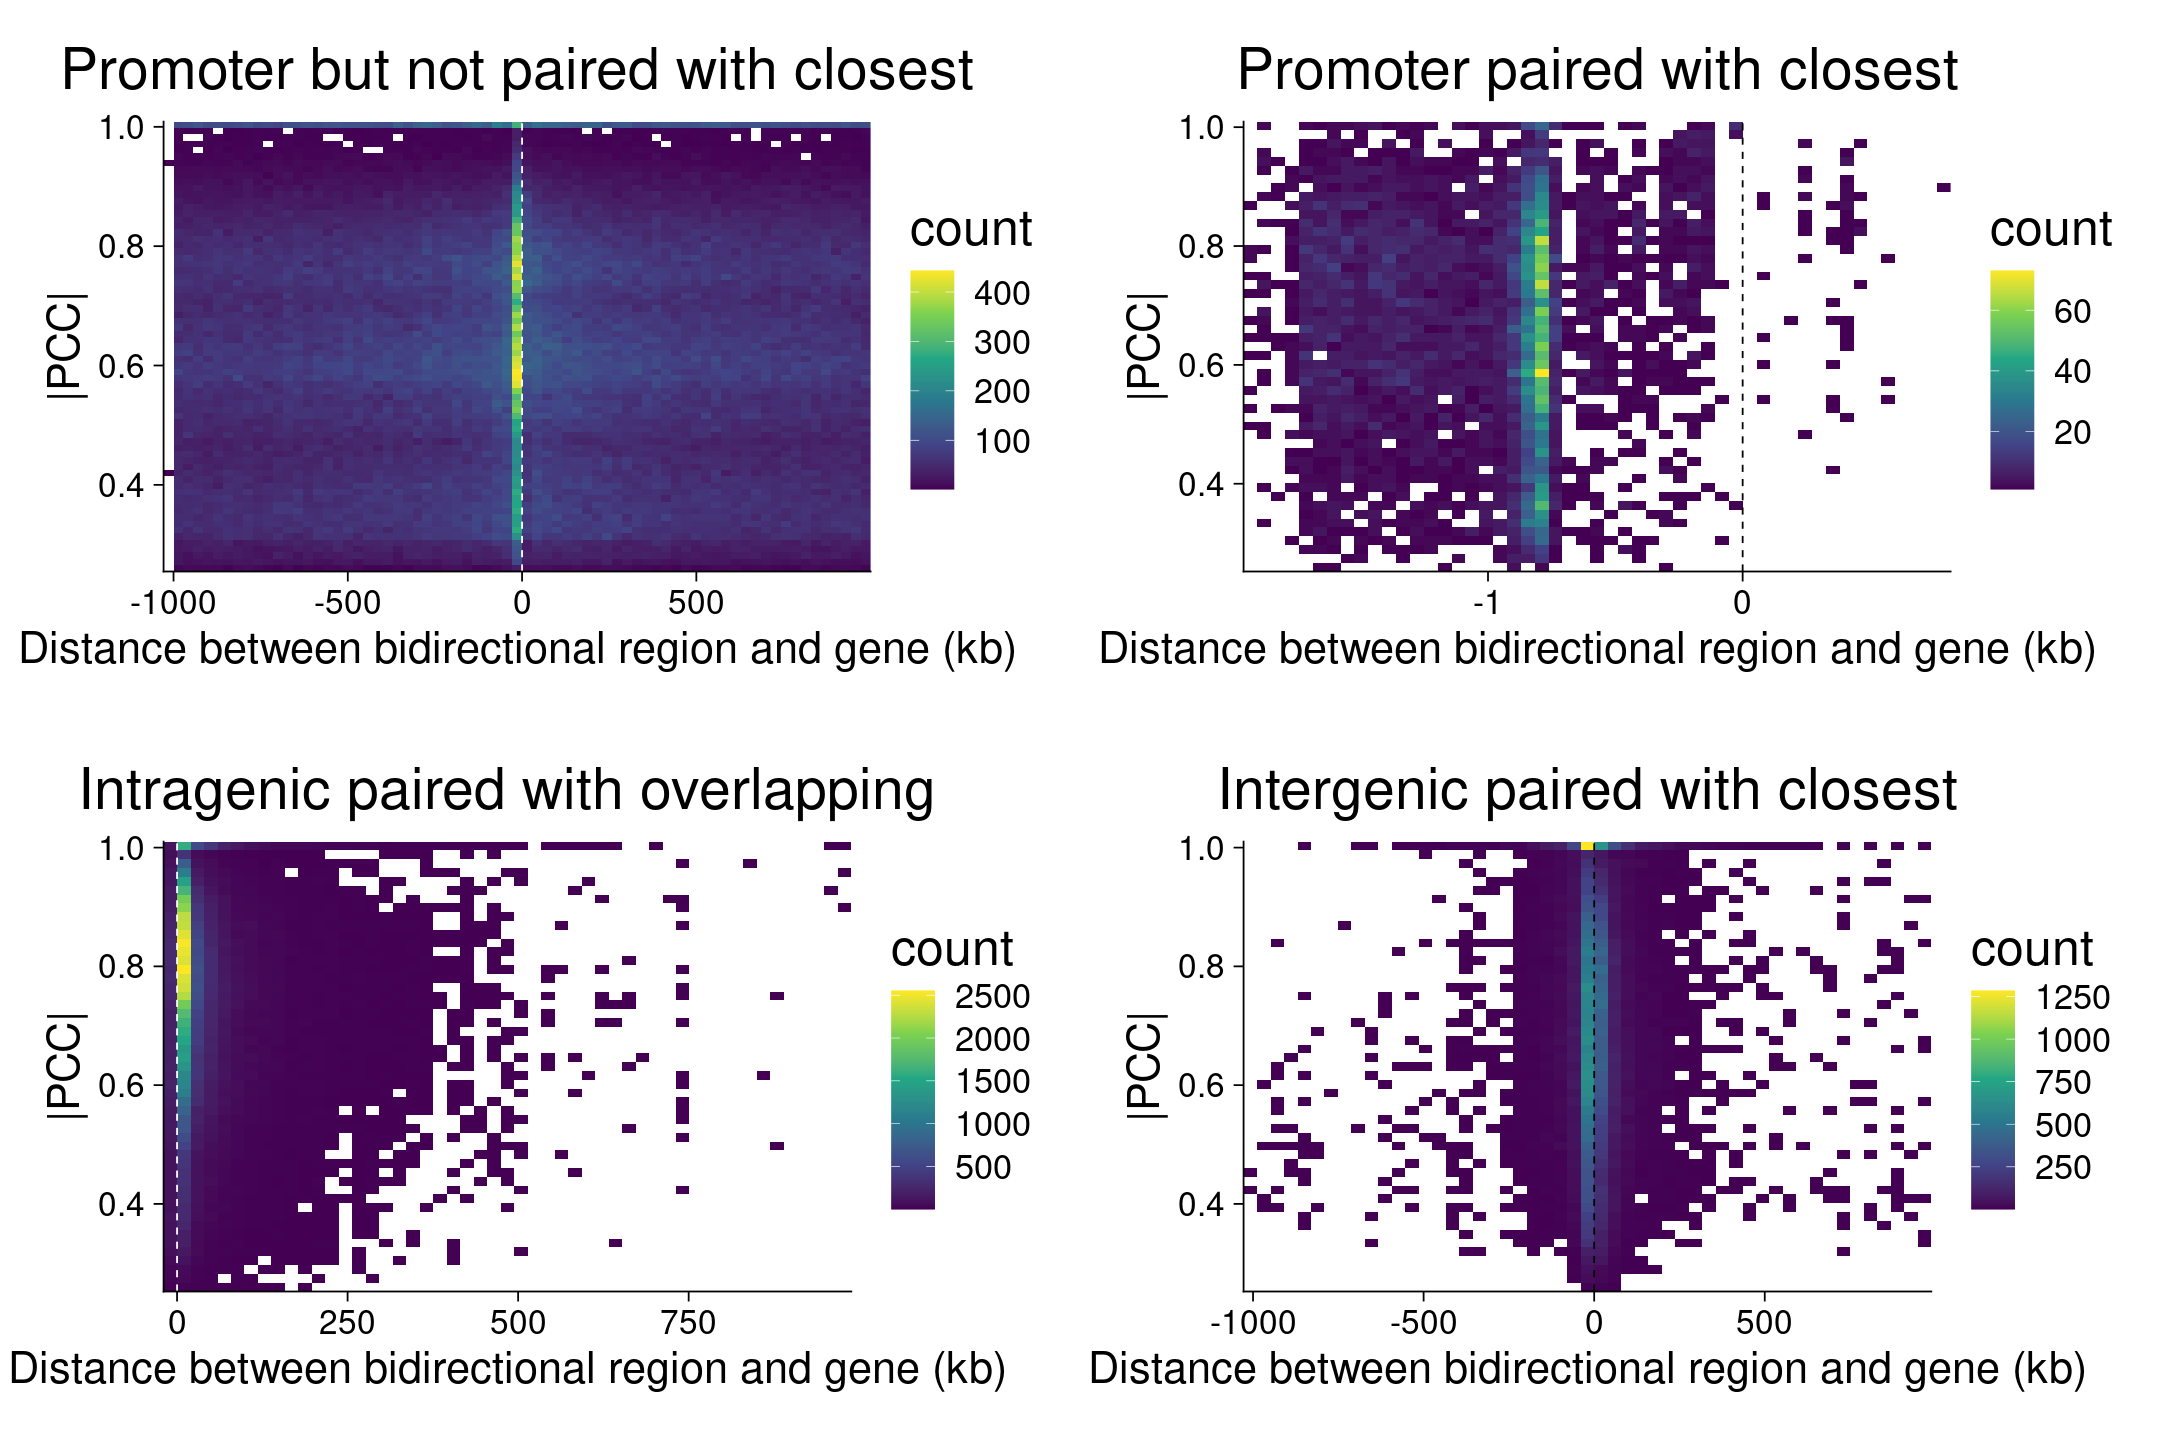

In [96]:
options(repr.plot.width=18, repr.plot.height=12)

pair_location_plot <- cowplot::plot_grid(prom_not_closest, prom_closest,
                                         intra_closest, inter_closest,
                                         nrow=2,
                                         #labels = c('A', 'B','C','D'),
                                        label_size = 36)
pair_location_plot

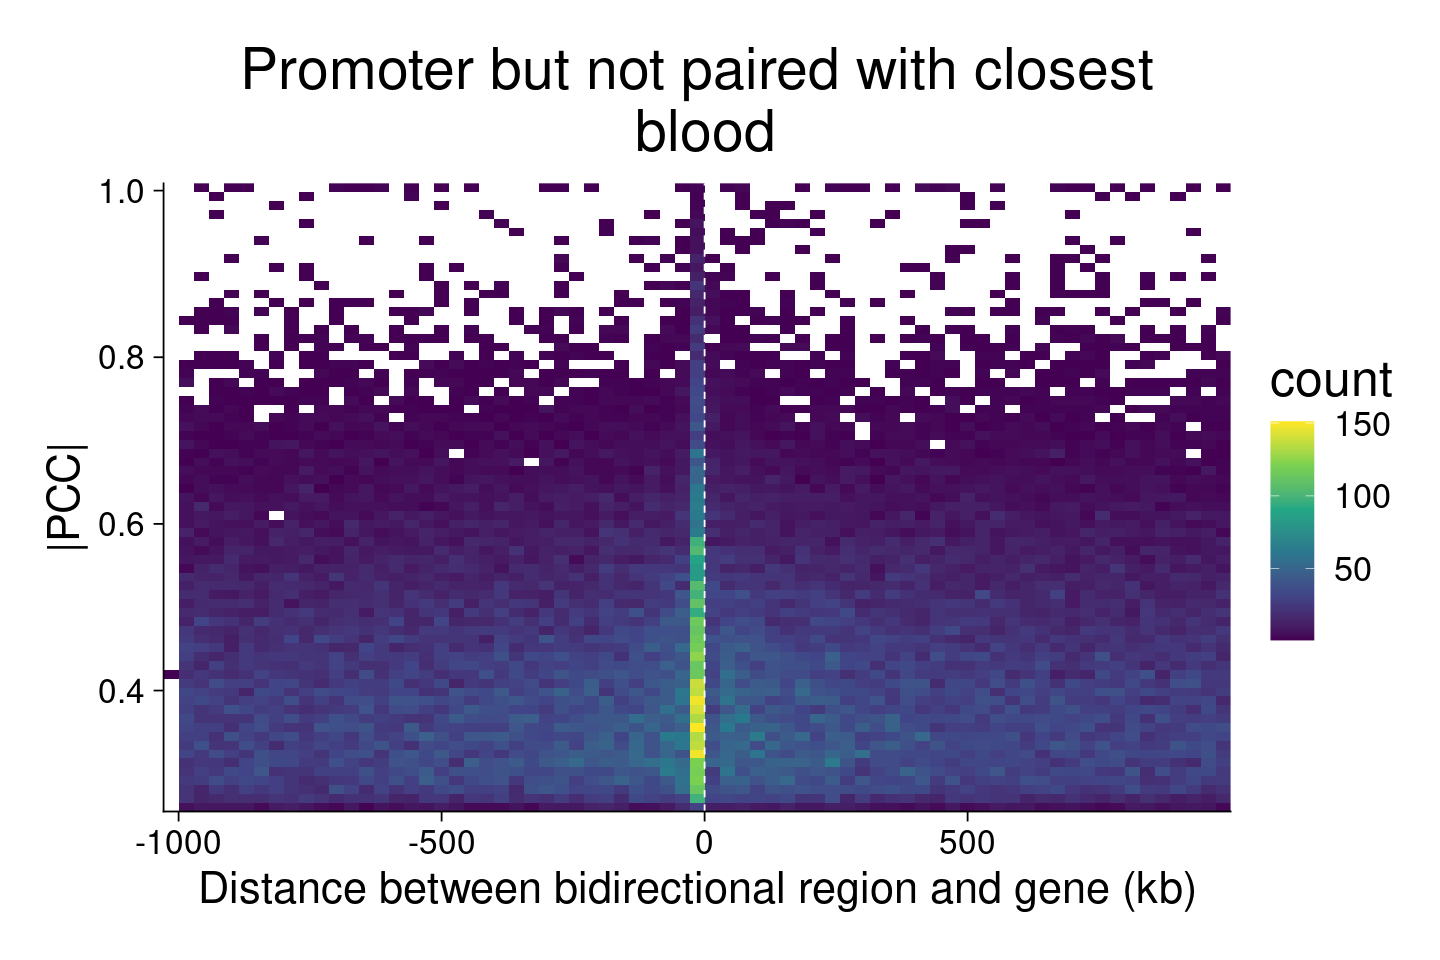

In [97]:
options(repr.plot.width=12, repr.plot.height=8)

prom_not_closest_blood <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                   corr_sig_DT_unique_prom_NOT_closest$pair_id & tissue =="blood",], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 70) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "white", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Promoter but not paired with closest\n blood") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

prom_not_closest_blood

Warning message:
“Removed 62601 rows containing non-finite outside the scale range
(`stat_bin2d()`).”
Warning message:
“Removed 27 rows containing missing values or values outside the scale range
(`geom_tile()`).”


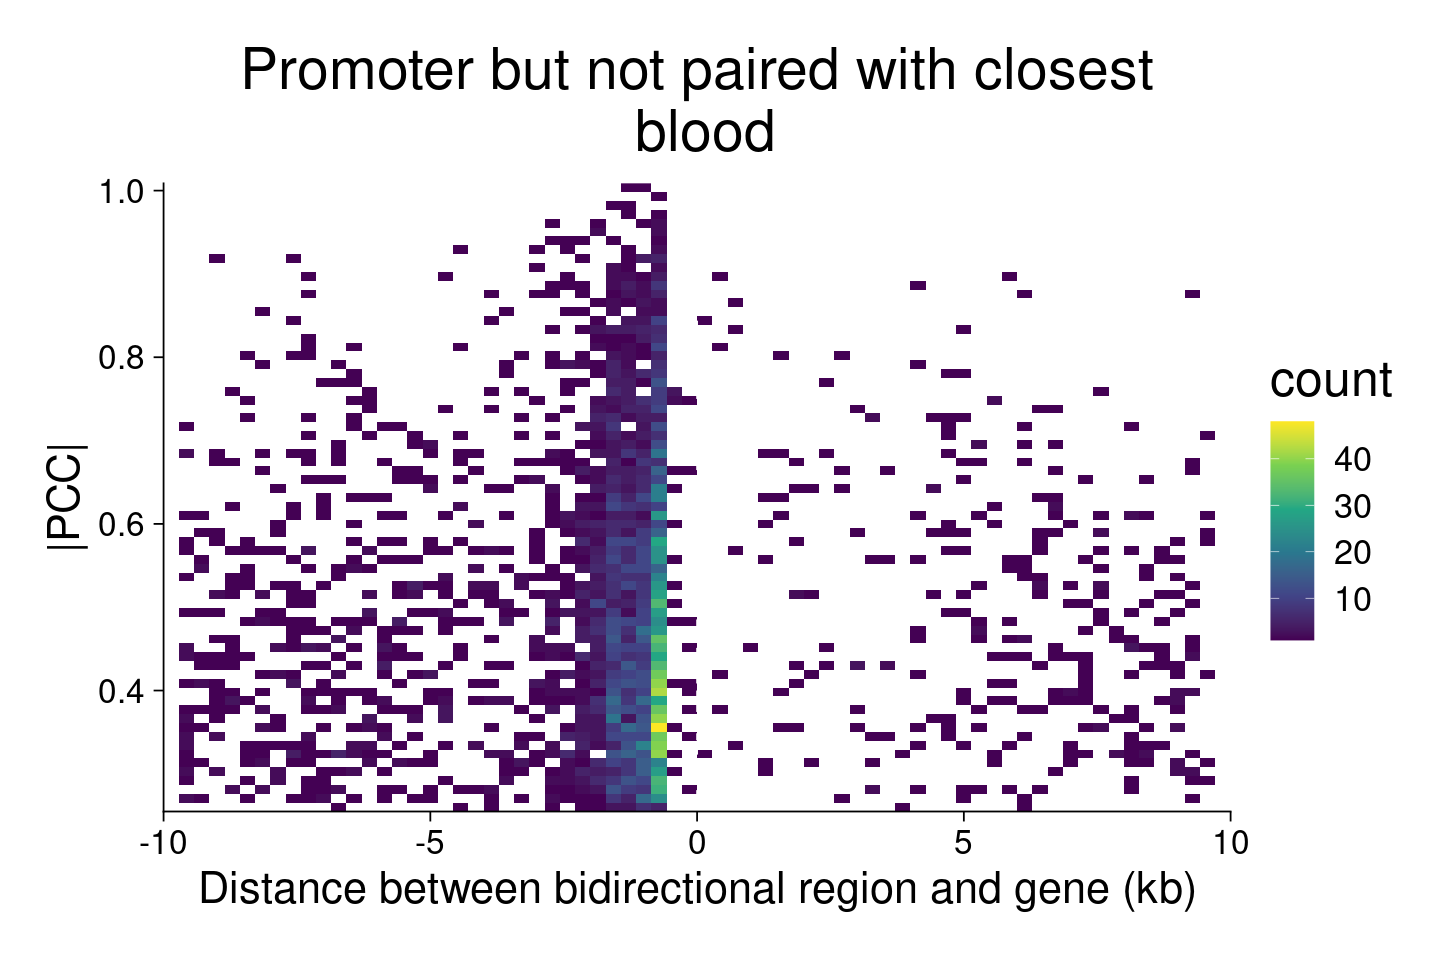

In [98]:
options(repr.plot.width=12, repr.plot.height=8)

prom_not_closest_blood_zoom <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                   corr_sig_DT_unique_prom_NOT_closest$pair_id & tissue =="blood",], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 70) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "white", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0), limits=c(-10,10)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Promoter but not paired with closest\n blood") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

prom_not_closest_blood_zoom

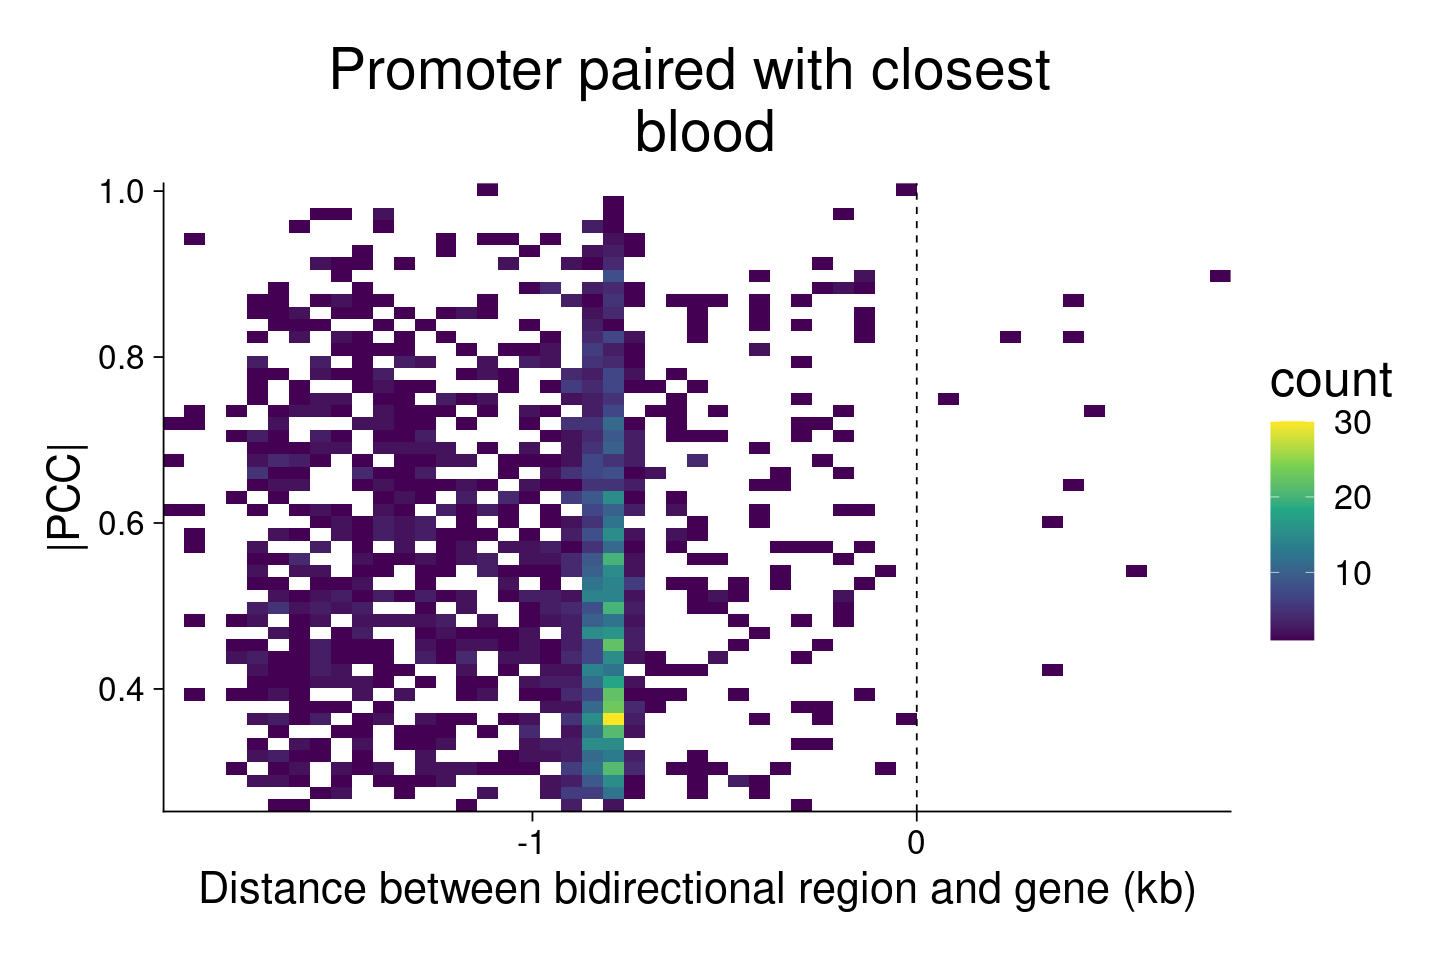

In [99]:
options(repr.plot.width=12, repr.plot.height=8)

prom_closest_blood <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                   corr_sig_DT_unique_prom_closest$pair_id & tissue == "blood",], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "black", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Promoter paired with closest \n blood") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

prom_closest_blood

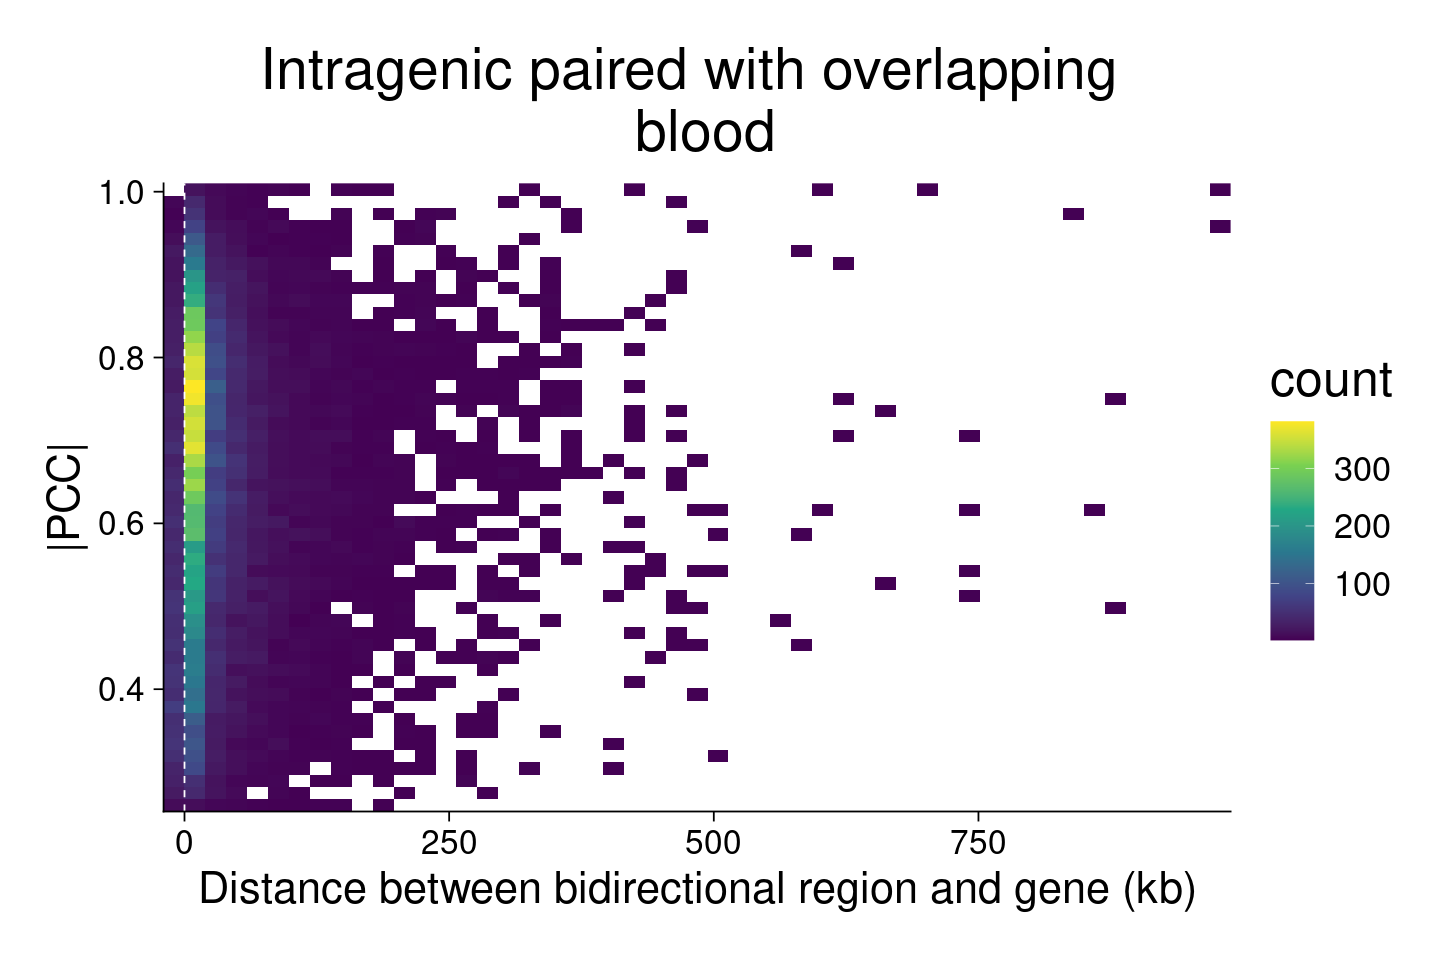

In [100]:
options(repr.plot.width=12, repr.plot.height=8)

intra_closest_blood <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                         corr_sig_DT_unique_in_gene$pair_id & tissue=="blood",], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "white", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Intragenic paired with overlapping \n blood") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

intra_closest_blood

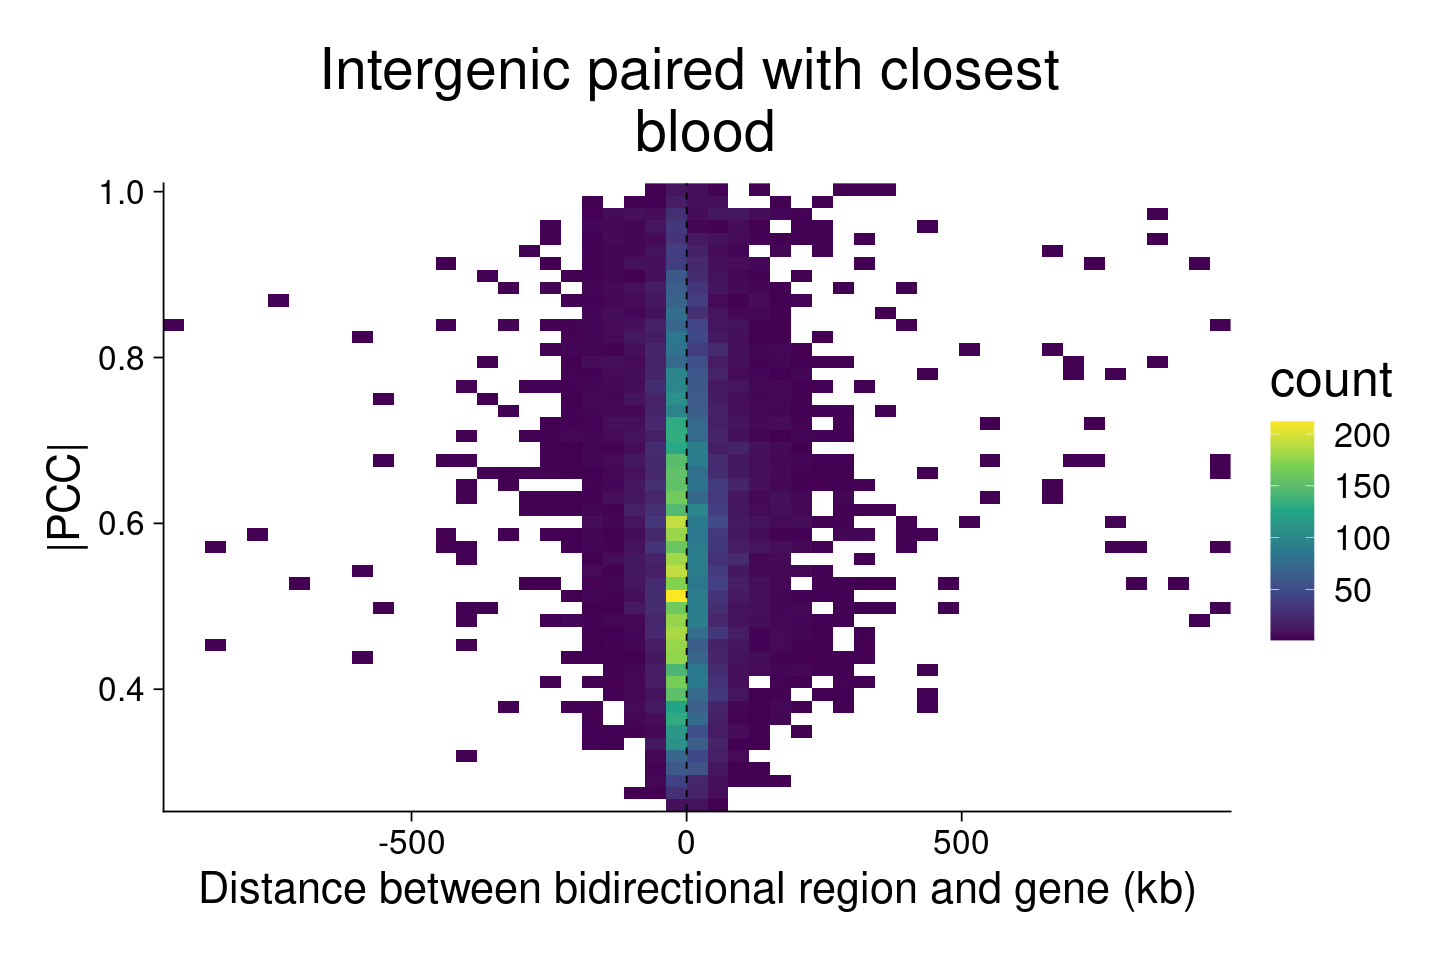

In [101]:
options(repr.plot.width=12, repr.plot.height=8)

inter_closest_blood <- ggplot(corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                         corr_sig_DT_unique_inter_closest$pair_id & tissue == "blood",], 
       aes(x = distance_tss/1000, 
           y = abs(pcc))) + 
geom_bin2d(bins = 50) +
  scale_fill_continuous(type = "viridis") +
geom_vline(xintercept = 0,
           linetype="dashed", 
           color = "black", 
           linewidth=0.5) +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Intergenic paired with closest \n blood") +
xlab("Distance between bidirectional region and gene (kb)") +
ylab("|PCC|") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

inter_closest_blood

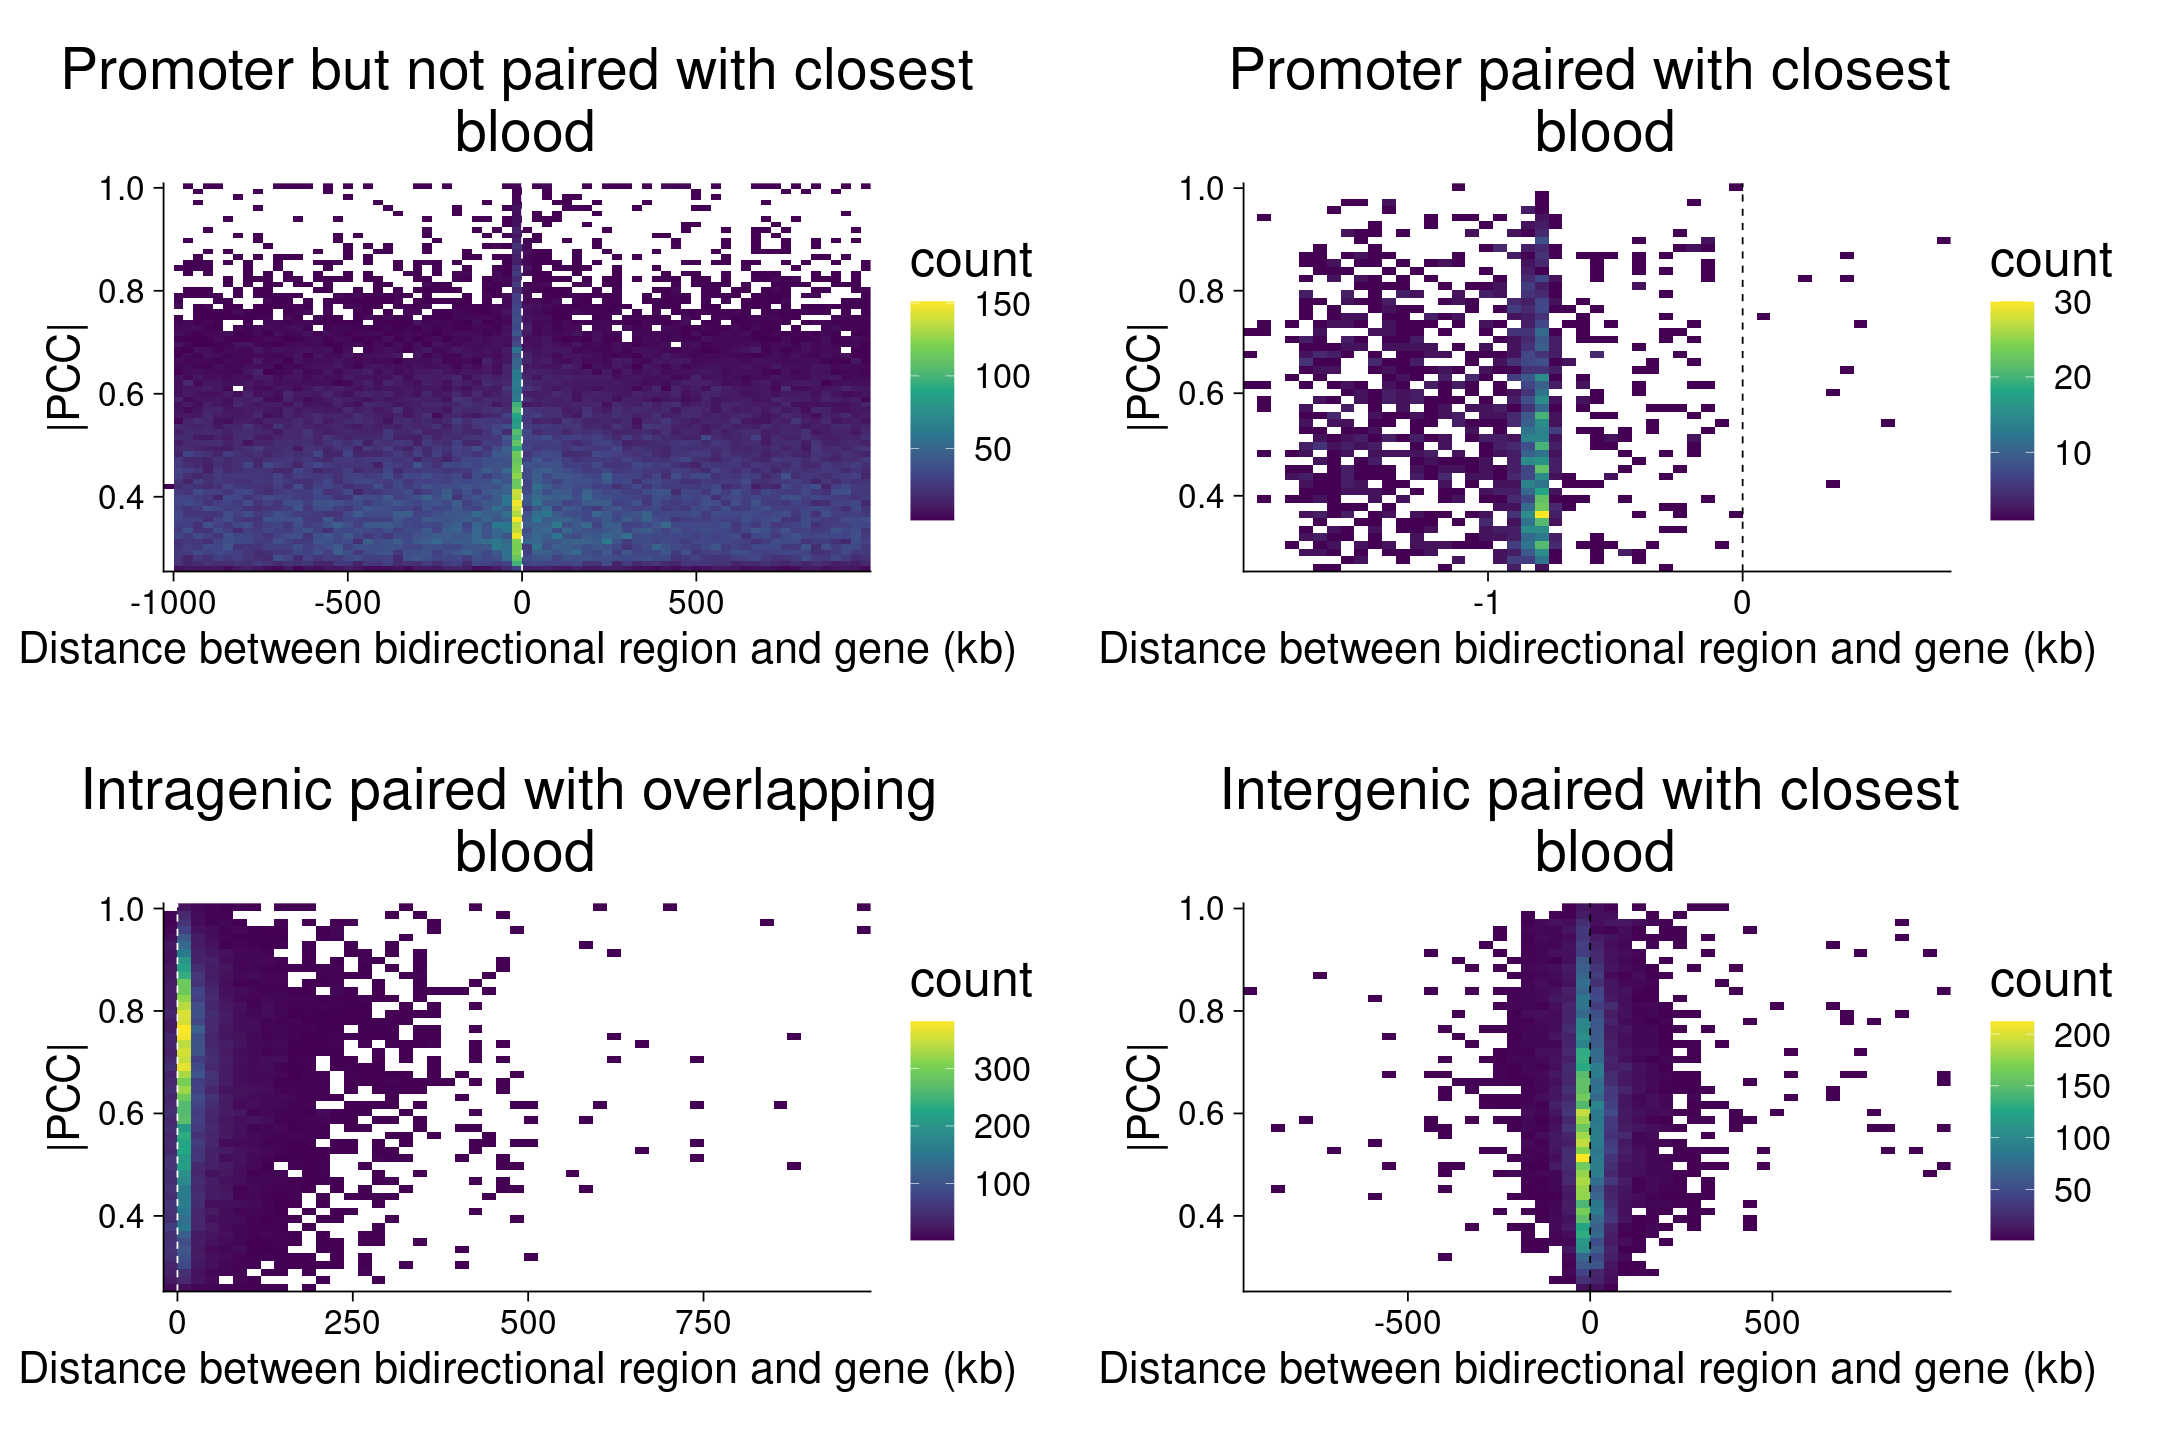

In [102]:
options(repr.plot.width=18, repr.plot.height=12)

pair_location_blood_plot <- cowplot::plot_grid(prom_not_closest_blood, 
                                               prom_closest_blood,
                                               intra_closest_blood, 
                                               inter_closest_blood,
                                         nrow=2,
                                         #labels = c('A', 'B','C','D'),
                                        label_size = 36)
pair_location_blood_plot

In [103]:
corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                         corr_sig_DT_unique_in_gene$pair_id & tissue=="blood" & distance_tss > 900000,]

transcript1_chrom,transcript1_start,transcript1_stop,transcript_1,transcript1_score,transcript1_strand,transcript2_chrom,transcript2_start,transcript2_stop,transcript_2,⋯,nObs,t,distance_tss,distance_tes,position,percent_transcribed_both,bidirectional_location,tissue,gene_id,pair_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr7,157539055,158541026,PTPRN2:NM_001308268.2,.,-,chr7,157553698,157554398,chr7:157553698-157554398,⋯,11,9.586299e+00,986978,-14993,downstream,4.954955,intragenic,blood,PTPRN2,PTPRN2:NM_001308268.2~chr7:157553698-157554398
chr7,157539055,158541026,PTPRN2:NM_001308268.2,.,-,chr7,157555296,157555748,chr7:157555296-157555748,⋯,3,1.347266e+05,985504,-16467,downstream,1.351351,intragenic,blood,PTPRN2,PTPRN2:NM_001308268.2~chr7:157555296-157555748


# Rank bidirectionas for pairs assessed

In [104]:
corr_sig_strict_DT_loop <- corr_sig_strict_DT[corr_sig_strict_DT$pair_id %in% 
                                                    overlap_looped_DT$pair_id,]

corr_sig_strict_DT_loop_blood <- subset(corr_sig_strict_DT_loop, tissue =="blood")
dim(corr_sig_strict_DT_loop_blood)
head(corr_sig_strict_DT_loop_blood, 3)

[1] 1342964      25

transcript1_chrom,transcript1_start,transcript1_stop,transcript_1,transcript1_score,transcript1_strand,transcript2_chrom,transcript2_start,transcript2_stop,transcript_2,⋯,nObs,t,distance_tss,distance_tes,position,percent_transcribed_both,bidirectional_location,tissue,gene_id,pair_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,125590,125860,chr10:125590-125860,⋯,153,6.711378,-55018,-124065,upstream,68.91892,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:125590-125860
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,968800,969156,chr10:968800-969156,⋯,134,5.245847,788235,719188,downstream,60.36036,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:968800-969156
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,970484,971044,chr10:970484-971044,⋯,188,4.688194,790021,720974,downstream,84.68468,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:970484-971044


In [105]:
nrow(subset(corr_sig_strict_DT, tissue=="blood"))

[1] 1874648

In [106]:
100*(nrow(corr_sig_strict_DT_loop_blood)/nrow(subset(corr_sig_strict_DT, tissue=="blood")))

[1] 71.6382

In [107]:
#merge the correlations with the ranks from all bidirectionals
#corr_sig_strict_DT_loop_blood_rank <- merge(corr_sig_strict_DT_loop_blood, 
#                                           closets_bidir_gene_dist[, c("pair_id", "bidir_rank")])

#dim(corr_sig_strict_DT_loop_blood_rank)
#head(corr_sig_strict_DT_loop_blood_rank)

#Rank bidirectionals based on distance from TSS
corr_sig_strict_DT_loop_blood$bidir_rank <- with(corr_sig_strict_DT_loop_blood, 
                                           ave(abs(distance_tss),
                                               gene_id, 
                                           FUN=function(x) (rank(x))))
                                                        
dim(corr_sig_strict_DT_loop_blood)
head(corr_sig_strict_DT_loop_blood, 3)

[1] 1342964      26

transcript1_chrom,transcript1_start,transcript1_stop,transcript_1,transcript1_score,transcript1_strand,transcript2_chrom,transcript2_start,transcript2_stop,transcript_2,⋯,t,distance_tss,distance_tes,position,percent_transcribed_both,bidirectional_location,tissue,gene_id,pair_id,bidir_rank
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,125590,125860,chr10:125590-125860,⋯,6.711378,-55018,-124065,upstream,68.91892,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:125590-125860,7
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,968800,969156,chr10:968800-969156,⋯,5.245847,788235,719188,downstream,60.36036,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:968800-969156,12
chr10,180743,249790,ZMYND11:NM_001202467.1,.,+,chr10,970484,971044,chr10:970484-971044,⋯,4.688194,790021,720974,downstream,84.68468,intergenic,blood,ZMYND11,ZMYND11:NM_001202467.1~chr10:970484-971044,13


In [108]:
max(corr_sig_strict_DT_loop_blood$bidir_rank)

[1] 442

In [109]:
#add bins for ranks
corr_sig_strict_DT_loop_blood$bidir_rank_range <- ifelse(corr_sig_strict_DT_loop_blood$bidir_rank > 0 &
                                                         corr_sig_strict_DT_loop_blood$bidir_rank <= 50,
                                                        "1-50", 
                                                         ifelse(corr_sig_strict_DT_loop_blood$bidir_rank > 50 &
                                                                corr_sig_strict_DT_loop_blood$bidir_rank <= 100,
                                                                ">50-100",
                                                                ifelse(corr_sig_strict_DT_loop_blood$bidir_rank > 100 &
                                                                corr_sig_strict_DT_loop_blood$bidir_rank <= 200,
                                                                      ">100-200",
                                                                      ifelse(corr_sig_strict_DT_loop_blood$bidir_rank > 200 &
                                                                corr_sig_strict_DT_loop_blood$bidir_rank <= 300,
                                                                            ">200-300", ">300-438"))))

corr_sig_strict_DT_loop_blood$bidir_rank_range <- factor(corr_sig_strict_DT_loop_blood$bidir_rank_range,
                                                        levels=c("1-50",">50-100",
                                                                 ">100-200",">200-300",
                                                                 ">300-438"))

In [110]:
rank_counts <- as.data.frame(table(corr_sig_strict_DT_loop_blood$bidir_rank_range))
rank_counts

Var1,Freq
<fct>,<int>
1-50,715704
>50-100,340034
>100-200,238304
>200-300,42702
>300-438,6220


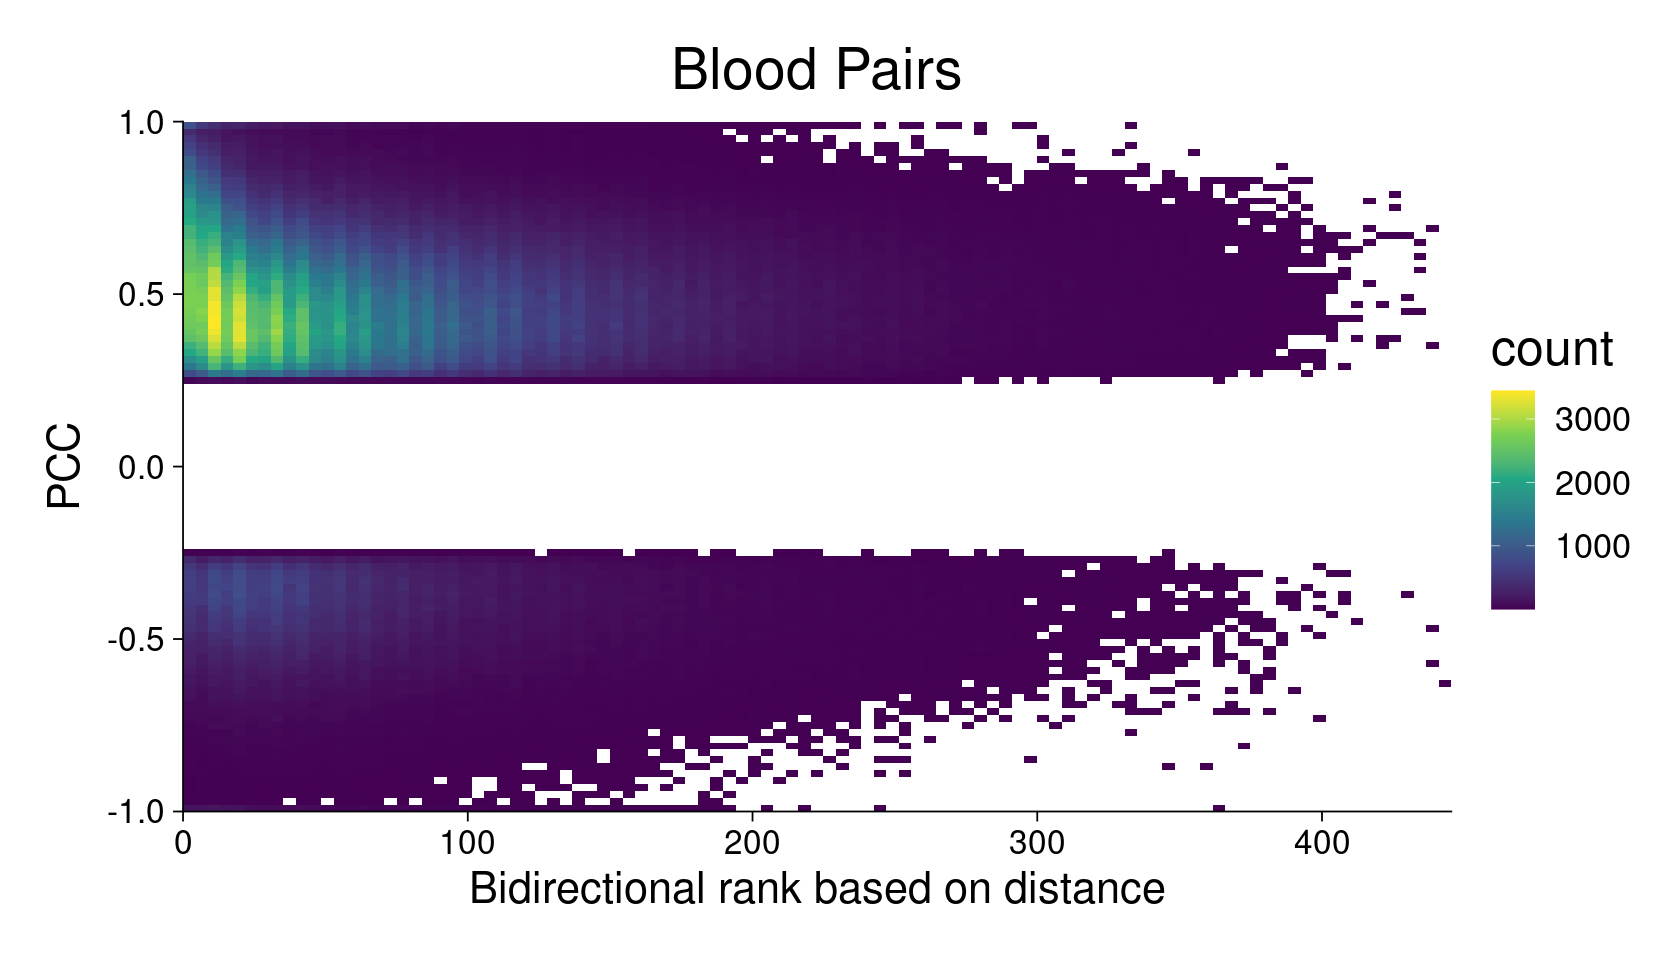

In [111]:
options(repr.plot.width=14, repr.plot.height=8)

blood_rank_pcc_scatter <- ggplot(corr_sig_strict_DT_loop_blood, 
       aes(x = bidir_rank, 
           y = pcc)) + 
#geom_point() +
geom_bin2d(bins = 100) +
scale_fill_continuous(type = "viridis") +
theme_cowplot(24)+
scale_x_continuous(expand = c(0, 0)) +
scale_y_continuous(expand = c(0, 0)) +
ggtitle("Blood Pairs") +
xlab("Bidirectional rank based on distance") +
ylab("PCC") +
theme(plot.title = element_text(hjust = 0.5, face='plain'),
      title = element_text(size = 30), 
      axis.title = element_text(size = 26), 
      axis.text.x = element_text(size = 20),
      axis.text.y = element_text(size = 20)) +
theme(plot.margin = margin(1,1,1,1, "cm"))

blood_rank_pcc_scatter

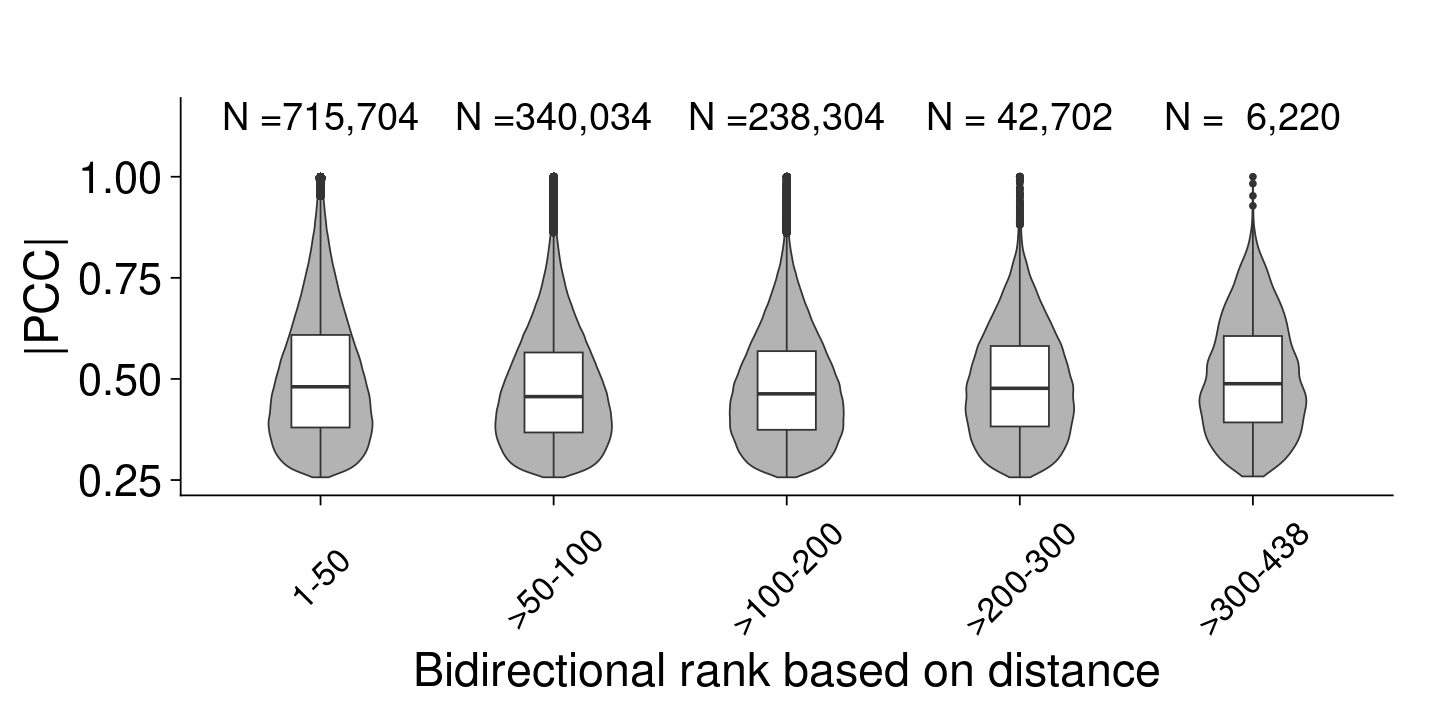

In [112]:
options(repr.plot.width=12, repr.plot.height=6)

blood_rank_pcc_dotviolinplot <- ggplot(corr_sig_strict_DT_loop_blood, 
                                   aes(x=bidir_rank_range,
                                       y=abs(pcc))) + 
geom_violin(fill="gray60",
            alpha=0.75,
           width=0.5) +
geom_boxplot(width=0.25) +
annotate("text",
         x=c(1:nrow(rank_counts)),
         y=rep(1.15, nrow(rank_counts)), 
         label= paste0("N =",format(rank_counts$Freq, 
       scientific = FALSE, big.mark = ',')),
         size = 8) + 
labs(title = " ", 
       x = "Bidirectional rank based on distance",
       y = "|PCC|") +
theme_cowplot(24) +
scale_fill_manual(values=c("#440154FF","#73D055FF")) +
theme(plot.title = element_text(hjust = 0.5, face="plain"),
      title = element_text(size = 30), 
      axis.title = element_text(size = 28),
      axis.text.y = element_text(size = 26),
      axis.text.x = element_text(size = 20, angle=45, vjust=0.5, hjust=0.5)) +
theme(plot.margin = margin(0.5,1,0.5,0.5, "cm"))

blood_rank_pcc_dotviolinplot

# Session information

In [113]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/libopenblasp-r0.3.3.so;  LAPACK version 3.8.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Denver
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.3     ggplot2_3.5.1     data.table_1.16.2

loaded via a namespace (and not attached):
 [1] crayon_1.5.3      vctrs_0.6.5       cli_3.6.3         rlang_1.1.4      
 [5] generics_0.1.3    jsonlite_1.8.9    labeling_0.4.3    glue_1.8.0       
 [9] co